In [1]:
# Imagen("Files/banner nocountry.jpg", (20,10))

StatementMeta(, e396ebe1-44f0-4759-81ec-36d84ab2cff1, 3, Finished, Available)

# Importaciones

In [2]:
!pip install missingno -q

StatementMeta(, e396ebe1-44f0-4759-81ec-36d84ab2cff1, 4, Finished, Available)

In [3]:
# Modulos a utilizar
import os
import pandas as pd
import numpy as np
import pyarrow as pa
import pyarrow.parquet as pq
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
#import funciones
import warnings
warnings.filterwarnings(action= 'ignore')


StatementMeta(, e396ebe1-44f0-4759-81ec-36d84ab2cff1, 5, Finished, Available)

# Funciones

In [4]:
def Imagen(path_relativo: str, size: tuple[int,int], path_absoluto:  None|str= None):

    """
    Esta funcion recibe un path relativo referente a una imagen (o un path absoluto), y el tamaño/dimensiones que
    debe tener en forma de tupla (width, height)

    devuelve la imagen pasada con las dimensiones obtenidas

    parameters: path_relativo (str), size (tuple[int,int]), path_absoluto(None,str)

    returns: None
    """

    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg

    if path_absoluto == None:
        # Load image
        image = mpimg.imread("/lakehouse/default/" + path_relativo)
    else:
        # Load image
        image = mpimg.imread(path_absoluto)
    # Let the axes disappear
    plt.figure(figsize= size)
    plt.axis('off')
    # Plot image in the output
    image_plot = plt.imshow(image)

StatementMeta(, e396ebe1-44f0-4759-81ec-36d84ab2cff1, 6, Finished, Available)

In [29]:
def verificar_tipo_datos(df):
    
    mi_dict = {"nombre_campo": [], "tipo_datos": [], "no_nulos_%": [], "nulos_%": [], "nulos": []}

    for columna in df.columns:
        porcentaje_no_nulos = (df[columna].count() / len(df)) * 100
        mi_dict["nombre_campo"].append(columna)
        mi_dict["tipo_datos"].append(df[columna].apply(type).unique())
        mi_dict["no_nulos_%"].append(round(porcentaje_no_nulos, 2))
        mi_dict["nulos_%"].append(round(100-porcentaje_no_nulos, 2))
        mi_dict["nulos"].append(df[columna].isnull().sum())

    df_info = pd.DataFrame(mi_dict)
    pd.set_option('display.max_rows', None)

    return df_info

StatementMeta(, e396ebe1-44f0-4759-81ec-36d84ab2cff1, 31, Finished, Available)

In [6]:
def informe_dataframe(dataframe: pd.DataFrame) -> None:

    df = dataframe

    print('INFORME PRELIMINAR SOBRE CARACTERISTICAS DEL DATASET:\n')
    print(f'--Dimensiones del DataFrame--\nFilas: {df.shape[0]}\nColumnas: {df.shape[1]}\n')
    print(f'--Numero de datos--\n{df[df.isna() == False].count().sum()}\n')
    print(f'--Filas y Columnas--\nFilas: muestra de indices-------> {list(df.index)[0:5]}  -----> Desde {list(df.index)[0]}  Hasta {list(df.index)[-1]}\nColumnas: {list(df.columns)}\n')
    print(f'--Tipo de columnas--\n{df.dtypes}\n')
    columnas= df.columns

    if 'hours' in columnas and 'attributes' not in columnas:
        print(f'--Cantidad de registros duplicados--\n{df.drop(columns=["hours"]).duplicated().sum()}\n')
    elif 'hours' not in columnas and 'attributes' in columnas:
        print(f'--Cantidad de registros duplicados--\n{df.drop(columns=["attributes"]).duplicated().sum()}\n')
    elif 'hours' in columnas and 'attributes' in columnas:
        print(f'--Cantidad de registros duplicados--\n{df.drop(columns=["hours","attributes"]).duplicated().sum()}\n')
    else:
        print(f'--Cantidad de registros duplicados--\n{df.duplicated().sum()}\n')


    # print(f'--Estadisticos preliminares generales--\n{df.describe()}\n')

    return ('~'*50)+'oo'+('~'*50)

StatementMeta(, e396ebe1-44f0-4759-81ec-36d84ab2cff1, 8, Finished, Available)

In [7]:
def informe_columna(df: None|pd.DataFrame, columna: None|str) -> None:

    data = df[columna]

    def valores_atipicos(muestra):
        import numpy as np

        if muestra.dtype != 'datetime64[ns]' and muestra.dtype != 'object':
            Q1= muestra.quantile(0.25)
            Q3= muestra.quantile(0.75)
            mediana= muestra.median()
            IQR= Q3-Q1

            print(f'Rango intercuartilico: {IQR}')

            limit_sup= Q3 + 1.5*IQR
            limit_inf= Q1 - 1.5*IQR
            print(f'Limite superior de la caja: {limit_sup}\n')
            # print(limit_inf)

            ## buscamos los valores atipicos
            superior= muestra >= (Q3 + 1.5*IQR)
            inferior=  muestra <= (Q1 - 1.5*IQR)

            print(f'Indices donde el valor excede el valor excede el limite superior de la caja:\n {np.where(superior)}\n')
            print(f'Indices donde el valor excede el valor excede el limite inferior de la caja:\n {np.where(inferior)}\n')
        else:
            pass

    # print(f'Informe preliminar sobre la columna/feature {columna}:\n')
    print(f'INFORME PRELIMINAR SOBRE LA COLUMNA/FEATURE {columna}:\n')
    if data.dtype == 'object':
        print(f'--Numero de datos nulos--\n{data.isna().sum()}\n')
        print(f'--Cantidad de valores unicos en la columna--\n{data.describe()[1]}\n')

        if len(data.unique()) > 5:
            print(f'--Valores unicos en la columna (Primeros 5 valores)--\n{data.unique()[0:5]}\n')
        else:
            print(f'--Valores unicos en la columna--\n{data.unique()}\n')
            
        print(f'--Moda de la columna especificada--\nValor modal -----> {data.describe()[2]}\nFrecuencia acumulada ------> {data.describe()[3]}\n')
        print(f'--Distribucion de frecuencias (primeros valores con mayor cantidad de frecuencias)--\n {data.value_counts().nlargest(3)}\n')
        print('-'*120)
        print('-'*120)
    elif data.dtype == 'datetime64[ns]':
        print(f'--Numero de datos nulos--\n{data.isna().sum()}\n')
        print(f'--Cantidad de valores unicos en la columna--\n{data.describe()[1]}\n')
        ## En el print siguinte, realizamos un formateo de los valores de la columna, ya que la salida predeterminada (el output) agrega otros valores que hacen la intrepretacion mas dificil e incomoda
        print(f'--Valores unicos en la columna--\nEj: {data.dt.strftime("%Y-%m-%d").unique()[0:3]}  -----> Desde {list(data.dt.strftime("%Y-%m-%d").unique())[0]}  Hasta {list(data.dt.strftime("%Y-%m-%d").unique())[-1]}\n')
        print(f'--Moda de la columna especificada--\nValor modal -----> {data.describe()[2]}\nFrecuencia acumulada ------> {data.describe()[3]}\n')
        print(f'--Distribucion de frecuencias (primeros valores con mayor cantidad de frecuencias)--\n {data.value_counts().nlargest(3)}\n')
        print(f'--Valor maximo y minimo--\nMaximo: {data.max()}\nMinimo: {data.min()}\n')
        print('-'*120)
        print('-'*120)
    else:
        print(f'--Numero de datos nulos--\n{data.isna().sum()}\n')
        print(f'--Valores unicos en la columna--\nEj: {data.unique()[0:5]}  -----> Desde {list(data.unique())[0]}  Hasta {list(data.unique())[-1]}\n')
        print(f'--Estadisticos Principales de la columna--\nMedia: {round(data.mean(),2)}\nDesviacion Estandar: {round(data.std(),2)}\nPrimer cuartil: {data.quantile(0.25)}\nMediana: {data.median()}\nTercer cuartil: {data.quantile(0.75)}\n')
        print(f'--Valores extremos--\nValor maximo: {data.max()}\nValor minimo: {data.min()}\n')
        print(f'--Distribucion de frecuencias (primeros valores con mayor cantidad de frecuencias)--\n {data.value_counts().nlargest(3)}\n')
        print(f'--Valor maximo y minimo--\nMaximo: {data.max()}\nMinimo: {data.min()}\n')
        valores_atipicos(data)
        print('-'*120)
        print('-'*120)
    return

StatementMeta(, e396ebe1-44f0-4759-81ec-36d84ab2cff1, 9, Finished, Available)

In [43]:
def visualizar_nulos(df):
    # fig, axes = plt.subplots(2, 2, figsize=(40, 40))

    # msno.matrix(df, ax=axes[0, 0])
    # msno.bar(df, ax=axes[0, 1])  
    # msno.heatmap(df, ax=axes[1, 0])
    # msno.dendrogram(df, ax=axes[1, 1])

    # axes[0, 0].set_title('Matrix Plot')
    # axes[0, 1].set_title('Bar Plot')
    # axes[1, 0].set_title('Heatmap')
    # axes[1, 1].set_title('Dendrogram')
    plt.figure(figsize= (30,30))

    msno.matrix(df)
    plt.title('Matrix Plot')

    msno.bar(df)
    plt.title('Bar Plot')  

    msno.heatmap(df)
    plt.title('Heatmap')
    
    msno.dendrogram(df)
    plt.title('Dendrogram')

    plt.tight_layout()
    plt.show()

StatementMeta(, e396ebe1-44f0-4759-81ec-36d84ab2cff1, 45, Finished, Available)

In [9]:
def analisis_frecuencia_palabras(dataframe: pd.DataFrame|None, ax=None):

    columnas_cualitativas = dataframe.select_dtypes(include=['object']).columns.tolist()

    if not columnas_cualitativas:
        return 'No existen columnas de tipo str en el dataframe'
    for columna in columnas_cualitativas:
        dataframe[columna] = dataframe[columna].astype(str)
    for columna in columnas_cualitativas:
        texto_columna = dataframe[columna].str.lower().str.replace(r'[^a-zA-Z\s]', '').str.split()
        palabras_columna = [word for sublist in texto_columna for word in sublist]
        frecuencia_palabras = Counter(palabras_columna)
        palabras_mas_frecuentes = frecuencia_palabras.most_common(20)
        plt.figure(figsize=(10, 6))
        plt.bar(*zip(*palabras_mas_frecuentes))
        plt.xticks(rotation=45)
        plt.xlabel('Palabra')
        plt.ylabel('Frecuencia')
        plt.title(f'Palabras más frecuentes en la columna {columna}')
        plt.show()

StatementMeta(, e396ebe1-44f0-4759-81ec-36d84ab2cff1, 11, Finished, Available)

In [10]:
def boxplots_numericas(dataframe):
    df_numericas = dataframe.select_dtypes(include=['number'])
    if df_numericas.empty:
        return 'No existen columnas de tipo numericas en el dataframe'
    for columna in df_numericas.columns:
        sns.boxplot(x=dataframe[columna])
        plt.title(f'Diagrama de caja para {columna}')
        plt.show()

StatementMeta(, e396ebe1-44f0-4759-81ec-36d84ab2cff1, 12, Finished, Available)

In [11]:
# def graficos_multiples(dataframe: pd.DataFrame) -> None:

#     fig, axs = plt.subplots(2, 1, figsize=(20, 10))
    
#     analisis_frecuencia_palabras(dataframe, ax=axs[0])
#     boxplots_numericas(dataframe, ax=axs[1])
    
#     plt.tight_layout()
#     plt.show()

####################arreglar#########################################

StatementMeta(, e396ebe1-44f0-4759-81ec-36d84ab2cff1, 13, Finished, Available)

In [17]:
def hist_duplicados(dataframe: str|pd.DataFrame):

    columnas= dataframe.columns

    if 'hours' in columnas and 'attributes' not in columnas:
        df_duplicates= dataframe.drop(columns=["hours"]).duplicated().value_counts()
    elif 'hours' not in columnas and 'attributes' in columnas:
        df_duplicates= dataframe.drop(columns=["attributes"]).duplicated().value_counts()
    elif 'hours' in columnas and 'attributes' in columnas:
        df_duplicates= dataframe.drop(columns=["hours","attributes"]).duplicated().value_counts()
    else:
        df_duplicates= dataframe.duplicated().value_counts()
        
    df_duplicates = pd.DataFrame({'Duplicados': df_duplicates.index, 'Frecuencia': df_duplicates.values})
    if not df_duplicates.empty: 
        sns.barplot(x='Duplicados', y='Frecuencia', data=df_duplicates)
        plt.title('Conteo de Frecuencias de Registros Duplicados')
        plt.xlabel('Duplicados')
        plt.ylabel('Frecuencia')
        plt.xticks([0, 1], ['No Duplicados', 'Duplicados'])
        plt.show()
    else:
        print("No se encontraron registros duplicados.")

StatementMeta(, e396ebe1-44f0-4759-81ec-36d84ab2cff1, 19, Finished, Available)

<h1 align= 'center><u>**Análisis**</u></h1>

# <h1 align= 'center'><u>Análisis</u></h1>

In [18]:
df1= pd.read_table('abfss://bd0d59dd-d605-4d54-a97d-9fd44f4630a0@onelake.dfs.fabric.microsoft.com/aff1f39f-8165-44c4-99e5-0e8782cdc635/Files/SB11_20231.TXT', header=0, sep="¬")

StatementMeta(, e396ebe1-44f0-4759-81ec-36d84ab2cff1, 20, Finished, Available)

In [19]:
df2= pd.read_table('abfss://bd0d59dd-d605-4d54-a97d-9fd44f4630a0@onelake.dfs.fabric.microsoft.com/aff1f39f-8165-44c4-99e5-0e8782cdc635/Files/SB11_20232.TXT', header=0, sep="¬")

StatementMeta(, e396ebe1-44f0-4759-81ec-36d84ab2cff1, 21, Finished, Available)

In [20]:
# vamos a unir ambos dataframes ya que provienen de una misma fuente y no existen conflictos en sus 
# features (el segundo dataframe contiene algunas columnas correspondientes a otros examenes que no
# corresponden al recurso en analisis)

df= pd.concat([df1,df2], join= 'inner')

StatementMeta(, e396ebe1-44f0-4759-81ec-36d84ab2cff1, 22, Finished, Available)

<h2 align= 'center'><u>Informe general</u></h2>

In [21]:
informe_dataframe(df)

StatementMeta(, e396ebe1-44f0-4759-81ec-36d84ab2cff1, 23, Finished, Available)

INFORME PRELIMINAR SOBRE CARACTERISTICAS DEL DATASET:

--Dimensiones del DataFrame--
Filas: 563853
Columnas: 81

--Numero de datos--
44022410

--Filas y Columnas--
Filas: muestra de indices-------> [0, 1, 2, 3, 4]  -----> Desde 0  Hasta 551148
Columnas: ['ESTU_TIPODOCUMENTO', 'ESTU_NACIONALIDAD', 'ESTU_GENERO', 'ESTU_FECHANACIMIENTO', 'PERIODO', 'ESTU_CONSECUTIVO', 'ESTU_ESTUDIANTE', 'ESTU_PAIS_RESIDE', 'ESTU_DEPTO_RESIDE', 'ESTU_COD_RESIDE_DEPTO', 'ESTU_MCPIO_RESIDE', 'ESTU_COD_RESIDE_MCPIO', 'ESTU_PRESENTACIONSABADO', 'FAMI_ESTRATOVIVIENDA', 'FAMI_PERSONASHOGAR', 'FAMI_CUARTOSHOGAR', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE', 'FAMI_TRABAJOLABORPADRE', 'FAMI_TRABAJOLABORMADRE', 'FAMI_TIENEINTERNET', 'FAMI_TIENESERVICIOTV', 'FAMI_TIENECOMPUTADOR', 'FAMI_TIENELAVADORA', 'FAMI_TIENEHORNOMICROOGAS', 'FAMI_TIENEAUTOMOVIL', 'FAMI_TIENEMOTOCICLETA', 'FAMI_TIENECONSOLAVIDEOJUEGOS', 'FAMI_NUMLIBROS', 'FAMI_COMELECHEDERIVADOS', 'FAMI_COMECARNEPESCADOHUEVO', 'FAMI_COMECEREALFRUTOSLEGUMBRE', '

'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~oo~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'

In [30]:
verificar_tipo_datos(df)

StatementMeta(, e396ebe1-44f0-4759-81ec-36d84ab2cff1, 32, Finished, Available)

nombre_campo         tipo_datos  no_nulos_%  nulos_%  \
0              ESTU_TIPODOCUMENTO    [<class 'str'>]      100.00     0.00   
1               ESTU_NACIONALIDAD    [<class 'str'>]      100.00     0.00   
2                     ESTU_GENERO    [<class 'str'>]      100.00     0.00   
3            ESTU_FECHANACIMIENTO    [<class 'str'>]      100.00     0.00   
4                         PERIODO    [<class 'int'>]      100.00     0.00   
5                ESTU_CONSECUTIVO    [<class 'str'>]      100.00     0.00   
6                 ESTU_ESTUDIANTE    [<class 'str'>]      100.00     0.00   
7                ESTU_PAIS_RESIDE    [<class 'str'>]      100.00     0.00   
8               ESTU_DEPTO_RESIDE    [<class 'str'>]      100.00     0.00   
9           ESTU_COD_RESIDE_DEPTO    [<class 'int'>]      100.00     0.00   
10              ESTU_MCPIO_RESIDE    [<class 'str'>]      100.00     0.00   
11          ESTU_COD_RESIDE_MCPIO    [<class 'int'>]      100.00     0.00   
12        ESTU_PRESENTACIONSABADO    [<class 'str'>]      100.00     0.00   
13           FAMI_ESTRATOVIVIENDA    [<class 'str'>]      100.00     0.00   
14             FAMI_PERSONASHOGAR    [<class 'str'>]      100.00     0.00   
15              FAMI_CUARTOSHOGAR    [<class 'str'>]      100.00     0.00   
16            FAMI_EDUCACIONPADRE    [<class 'str'>]      100.00     0.00   
17            FAMI_EDUCACIONMADRE    [<class 'str'>]      100.00     0.00   
18         FAMI_TRABAJOLABORPADRE    [<class 'str'>]      100.00     0.00   
19         FAMI_TRABAJOLABORMADRE    [<class 'str'>]      100.00     0.00   
20             FAMI_TIENEINTERNET    [<class 'str'>]      100.00     0.00   
21           FAMI_TIENESERVICIOTV    [<class 'str'>]      100.00     0.00   
22           FAMI_TIENECOMPUTADOR    [<class 'str'>]      100.00     0.00   
23             FAMI_TIENELAVADORA    [<class 'str'>]      100.00     0.00   
24       FAMI_TIENEHORNOMICROOGAS    [<class 'str'>]      100.00     0.00   
25            FAMI_TIENEAUTOMOVIL    [<class 'str'>]      100.00     0.00   
26          FAMI_TIENEMOTOCICLETA    [<class 'str'>]      100.00     0.00   
27   FAMI_TIENECONSOLAVIDEOJUEGOS    [<class 'str'>]      100.00     0.00   
28                 FAMI_NUMLIBROS    [<class 'str'>]      100.00     0.00   
29        FAMI_COMELECHEDERIVADOS    [<class 'str'>]      100.00     0.00   
30     FAMI_COMECARNEPESCADOHUEVO    [<class 'str'>]      100.00     0.00   
31  FAMI_COMECEREALFRUTOSLEGUMBRE    [<class 'str'>]      100.00     0.00   
32        FAMI_SITUACIONECONOMICA    [<class 'str'>]      100.00     0.00   
33   ESTU_DEDICACIONLECTURADIARIA    [<class 'str'>]      100.00     0.00   
34        ESTU_DEDICACIONINTERNET    [<class 'str'>]      100.00     0.00   
35        ESTU_HORASSEMANATRABAJA    [<class 'str'>]      100.00     0.00   
36          ESTU_TIPOREMUNERACION    [<class 'str'>]      100.00     0.00   
37              COLE_CODIGO_ICFES    [<class 'int'>]      100.00     0.00   
38  COLE_COD_DANE_ESTABLECIMIENTO    [<class 'int'>]      100.00     0.00   
39    COLE_NOMBRE_ESTABLECIMIENTO    [<class 'str'>]      100.00     0.00   
40                    COLE_GENERO    [<class 'str'>]      100.00     0.00   
41                COLE_NATURALEZA    [<class 'str'>]      100.00     0.00   
42                COLE_CALENDARIO    [<class 'str'>]      100.00     0.00   
43                  COLE_BILINGUE    [<class 'str'>]      100.00     0.00   
44                  COLE_CARACTER    [<class 'str'>]      100.00     0.00   
45             COLE_COD_DANE_SEDE    [<class 'int'>]      100.00     0.00   
46               COLE_NOMBRE_SEDE    [<class 'str'>]      100.00     0.00   
47            COLE_SEDE_PRINCIPAL    [<class 'str'>]      100.00     0.00   
48            COLE_AREA_UBICACION    [<class 'str'>]      100.00     0.00   
49                   COLE_JORNADA    [<class 'str'>]      100.00     0.00   
50       COLE_COD_MCPIO_UBICACION    [<class 'int'>]      100.00     0.00   
51           COLE

In [23]:
for columna in df.columns:
    informe_columna(df, columna)

StatementMeta(, e396ebe1-44f0-4759-81ec-36d84ab2cff1, 25, Finished, Available)

INFORME PRELIMINAR SOBRE LA COLUMNA/FEATURE ESTU_TIPODOCUMENTO:

--Numero de datos nulos--
0

--Cantidad de valores unicos en la columna--
10

--Valores unicos en la columna (Primeros 5 valores)--
['TI' 'CC' 'CE' 'CR' 'NES']

--Moda de la columna especificada--
Valor modal -----> TI
Frecuencia acumulada ------> 480214

--Distribucion de frecuencias (primeros valores con mayor cantidad de frecuencias)--
 ESTU_TIPODOCUMENTO
TI     480214
CC      71551
PPT      5541
Name: count, dtype: int64

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
INFORME PRELIMINAR SOBRE LA COLUMNA/FEATURE ESTU_NACIONALIDAD:

--Numero de datos nulos--
0

--Cantidad de valores unicos en la columna--
52

--Valores unicos en la columna (Primeros 5 valores)--
['COLOMBIA' 'ESPAÑA' 'FRANCIA' 'VENEZUELA' 'ARGENTINA']

--Moda de 

<h2 size= 22 align= 'center'><u>Gráficos</u></h2>

StatementMeta(, e396ebe1-44f0-4759-81ec-36d84ab2cff1, 46, Finished, Available)

<Figure size 3000x3000 with 0 Axes>

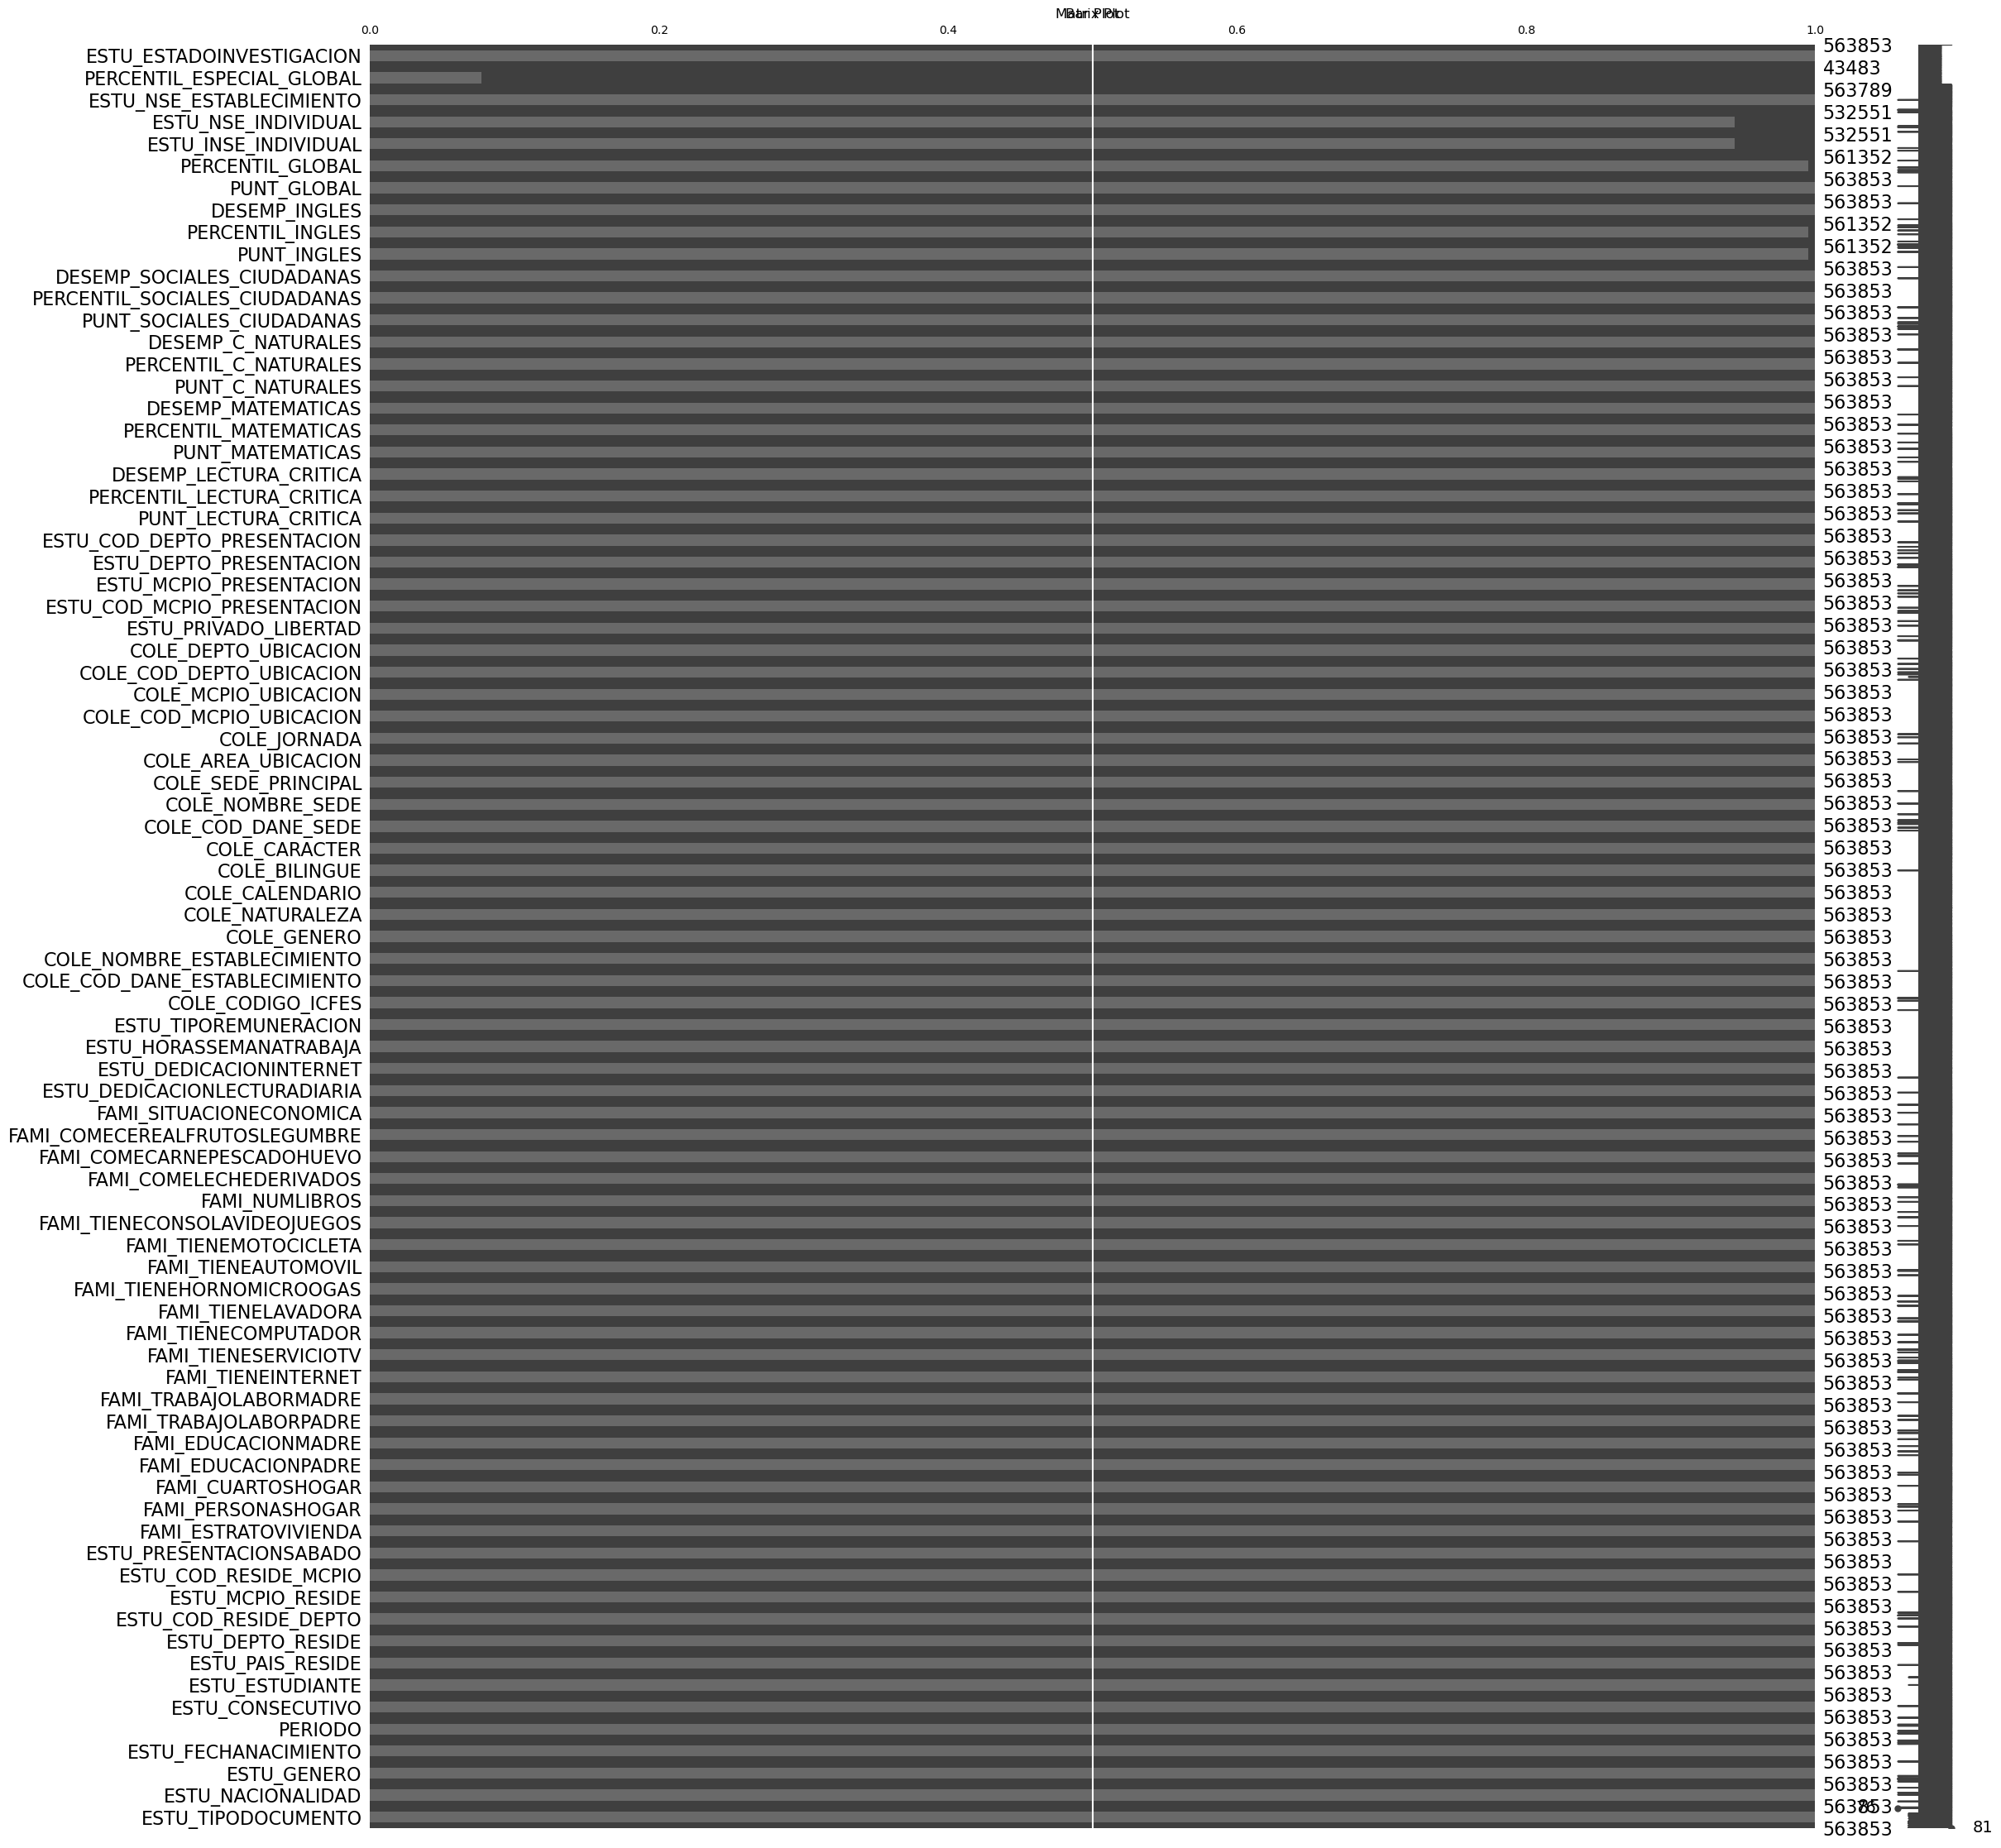

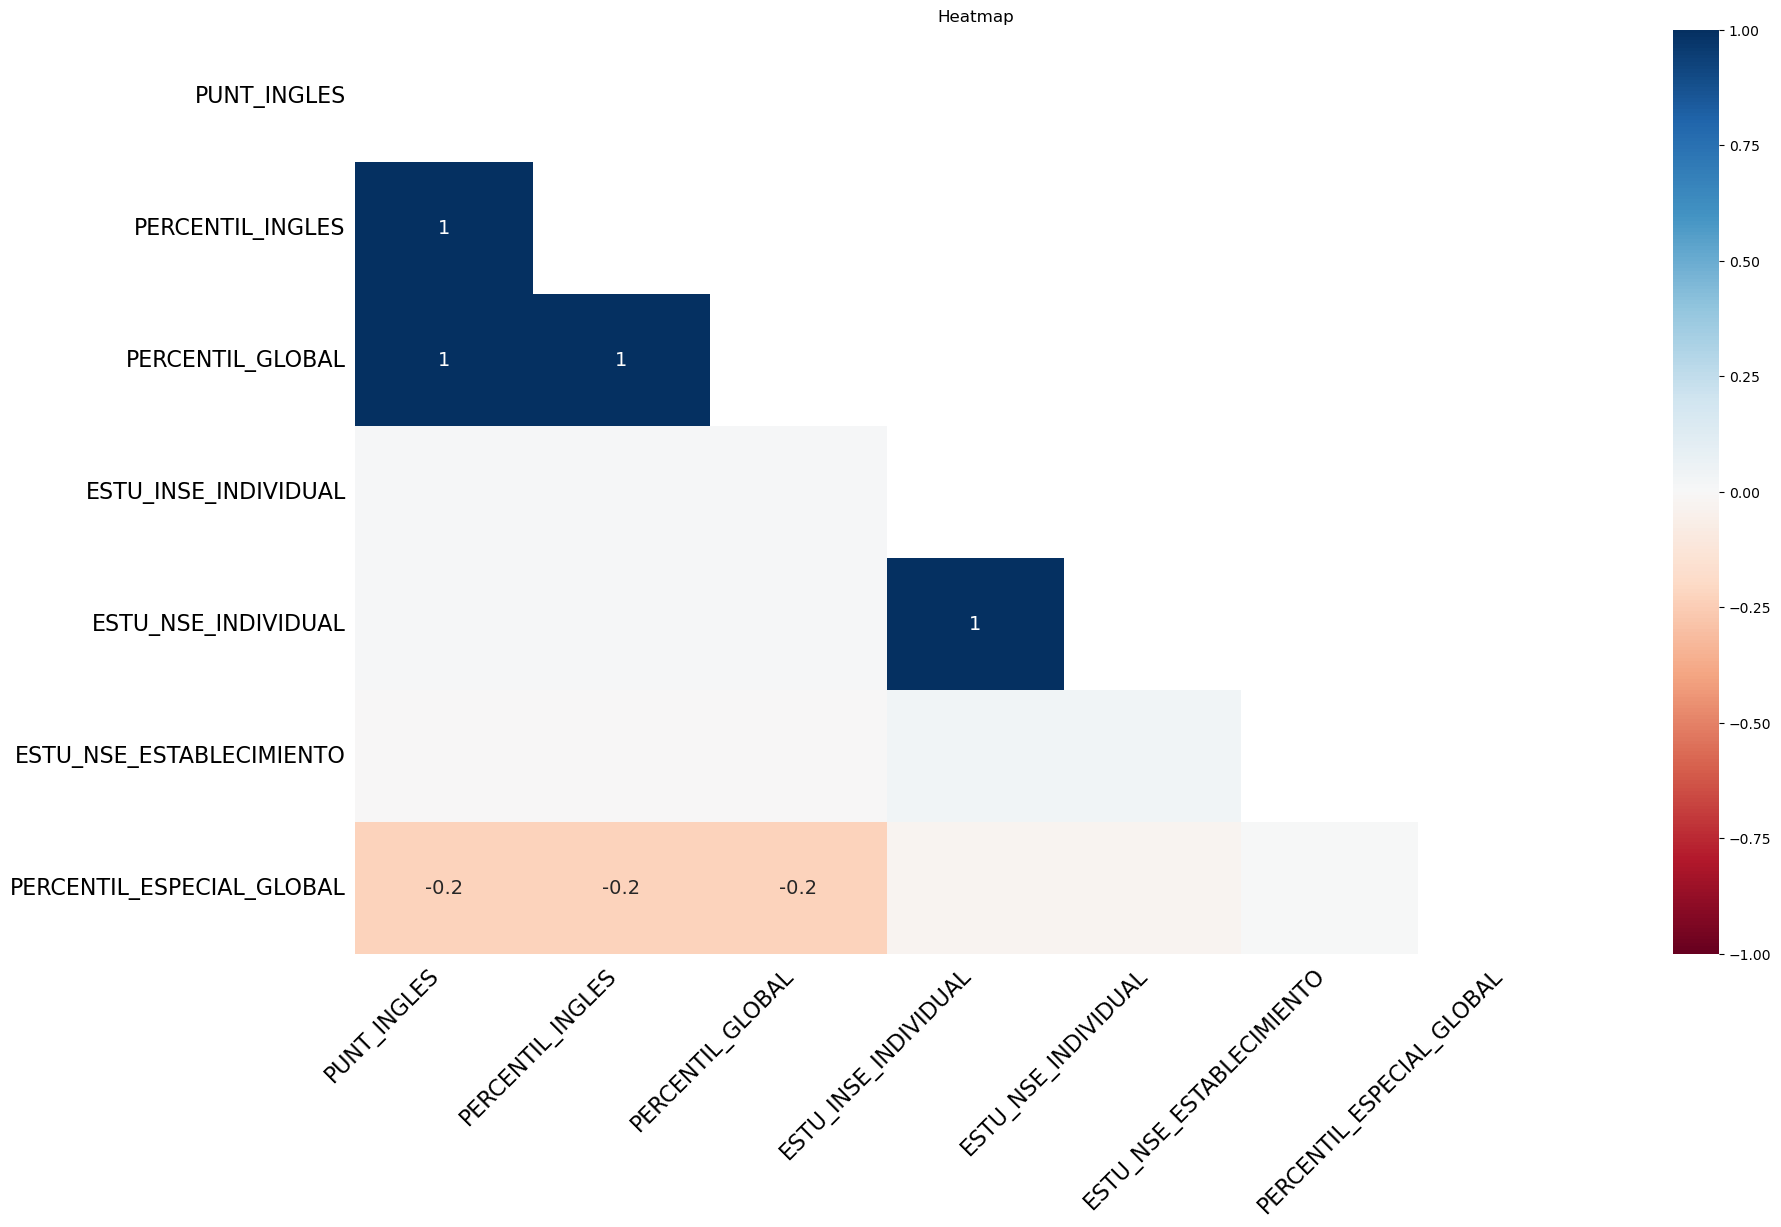

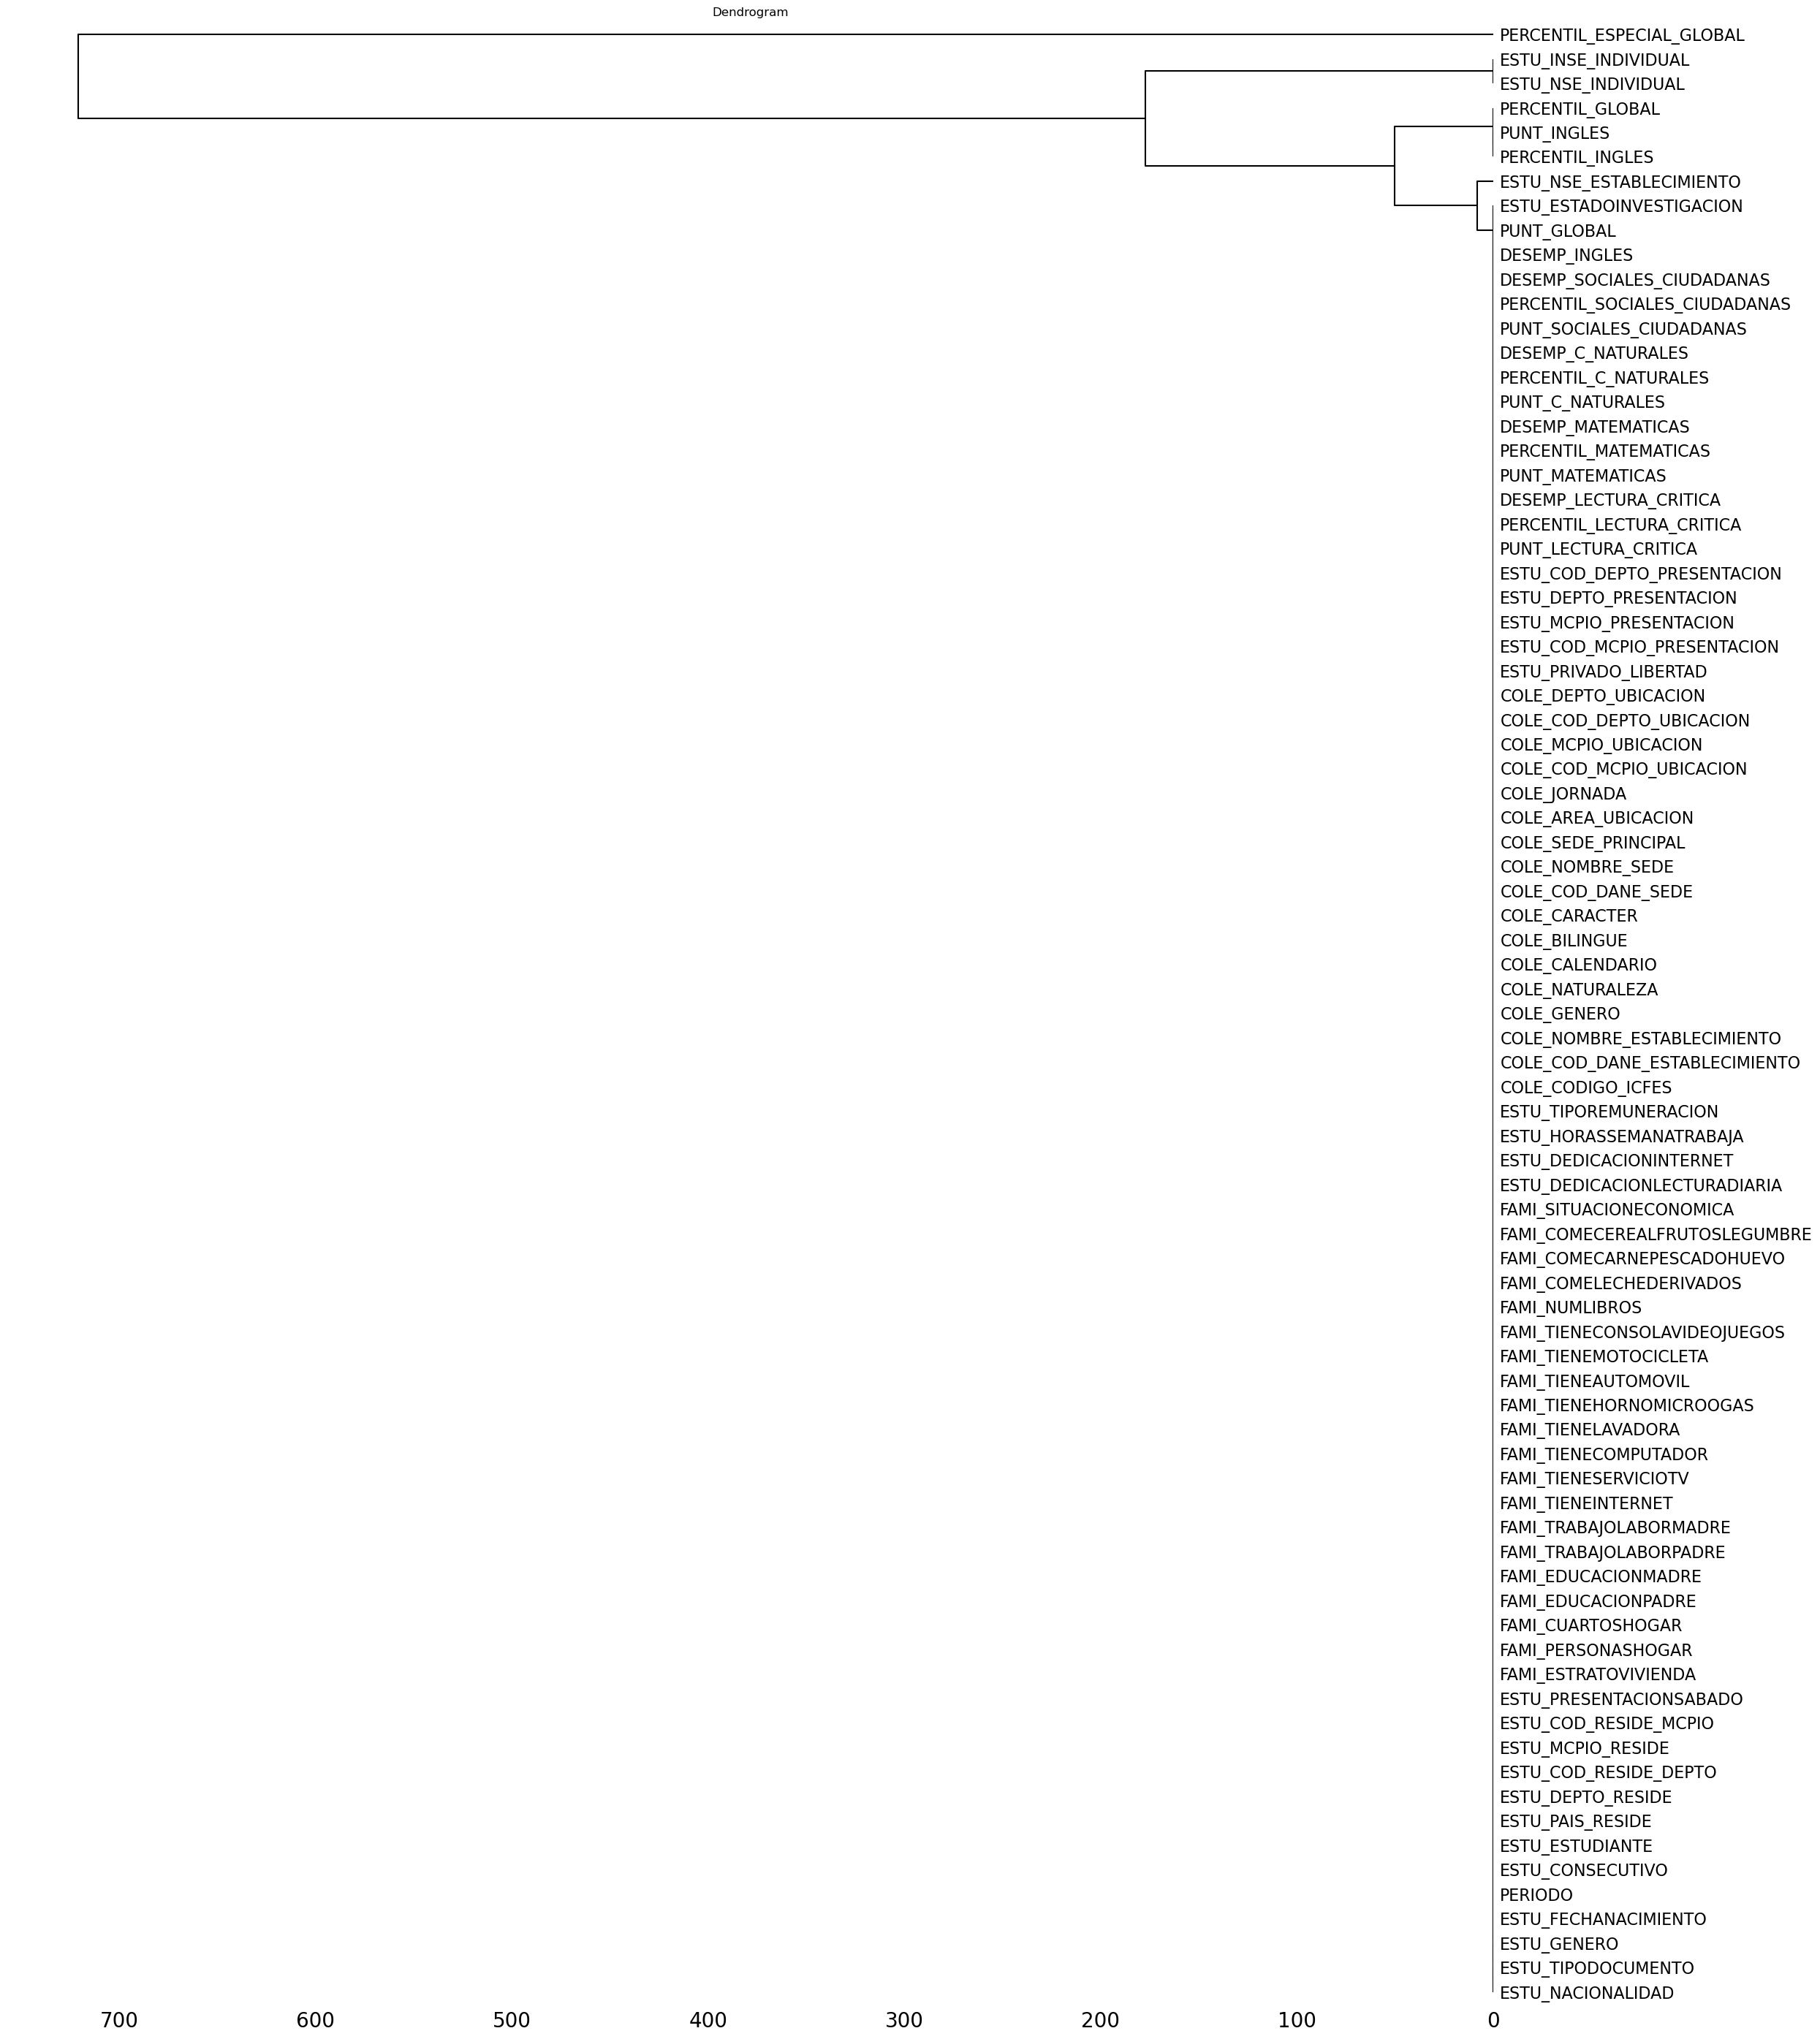

In [44]:
visualizar_nulos(df)

In [25]:
# graficos_multiples(df)

StatementMeta(, e396ebe1-44f0-4759-81ec-36d84ab2cff1, 27, Finished, Available)

StatementMeta(, e396ebe1-44f0-4759-81ec-36d84ab2cff1, 28, Finished, Available)

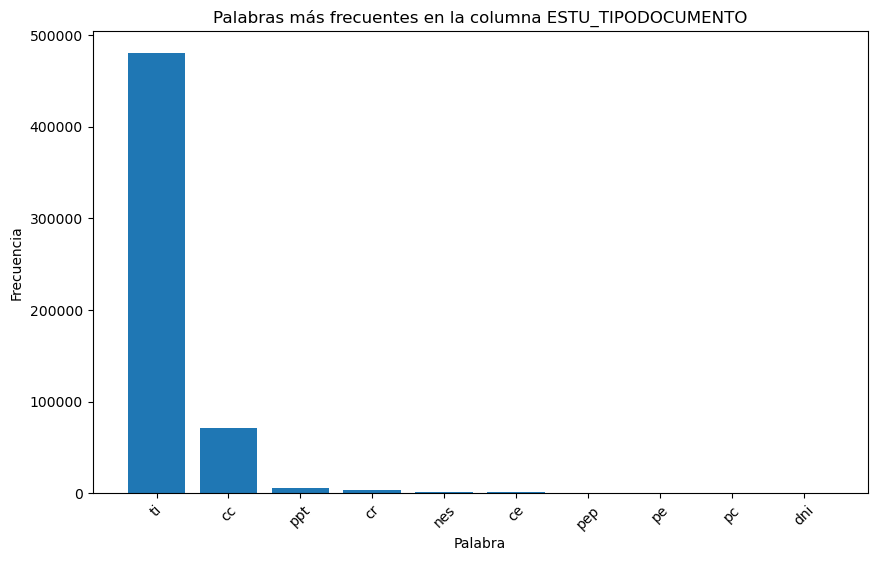

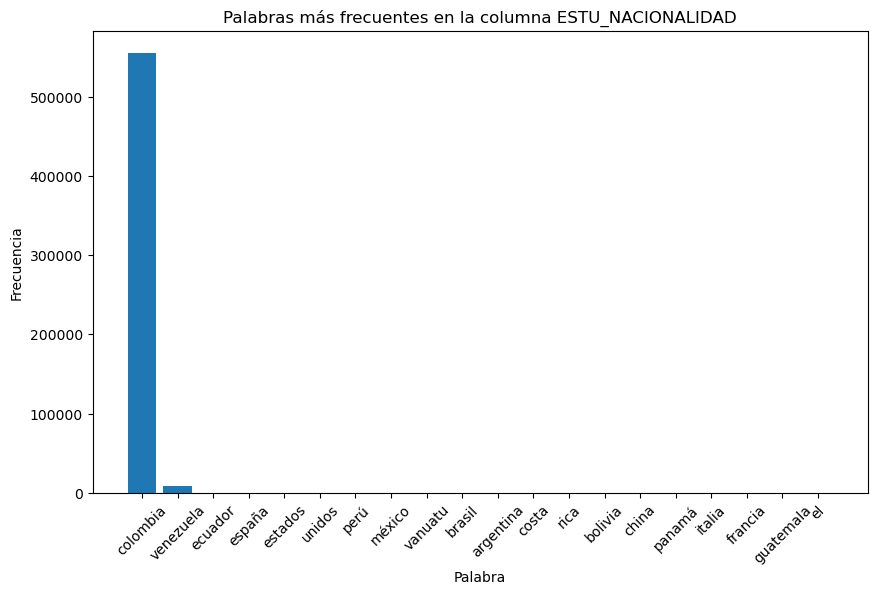

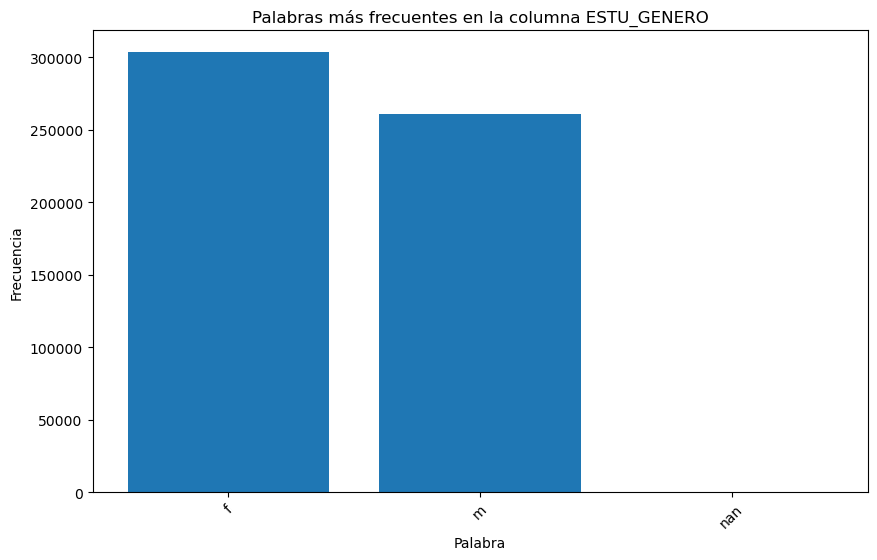

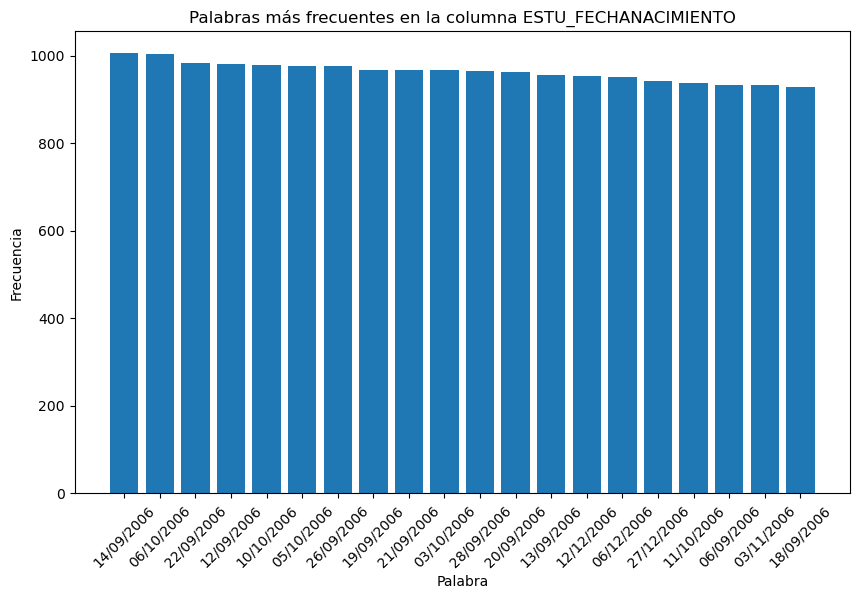

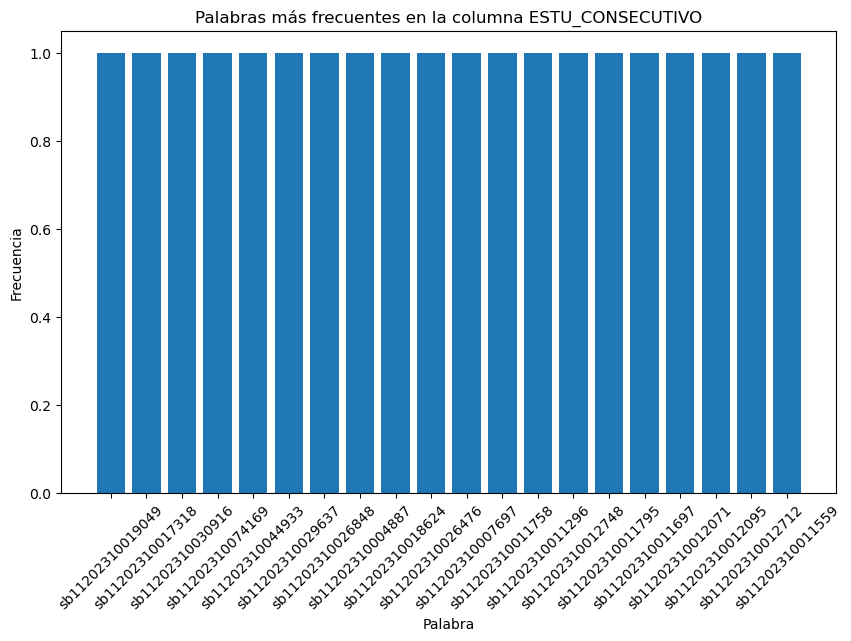

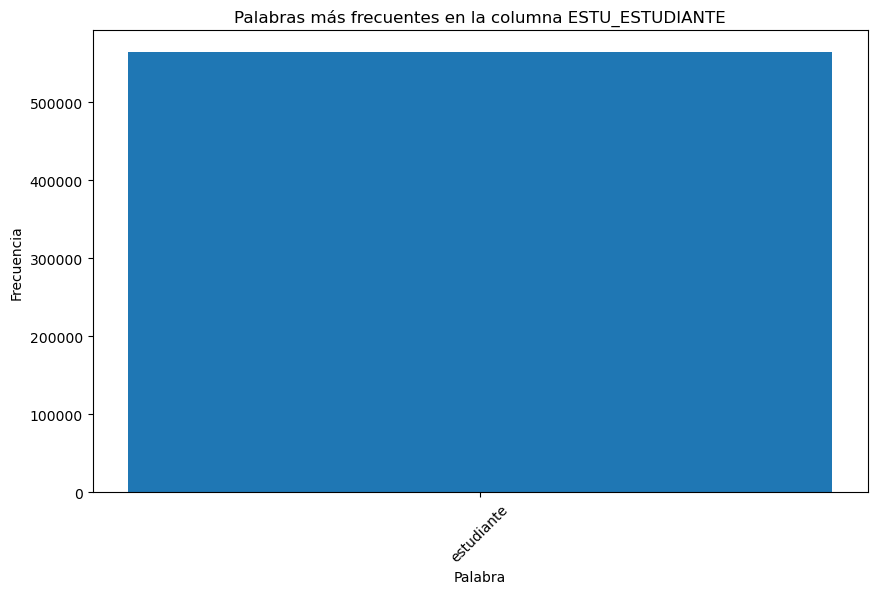

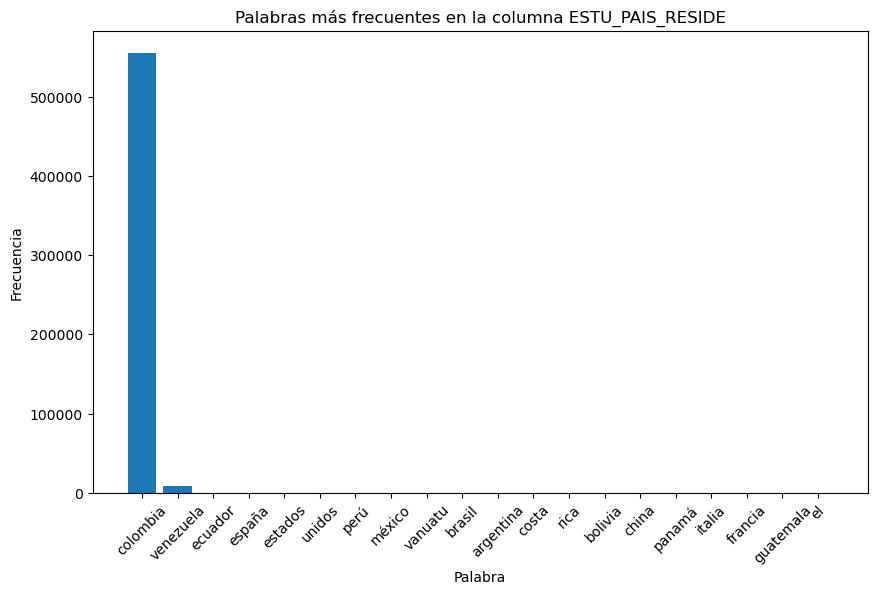

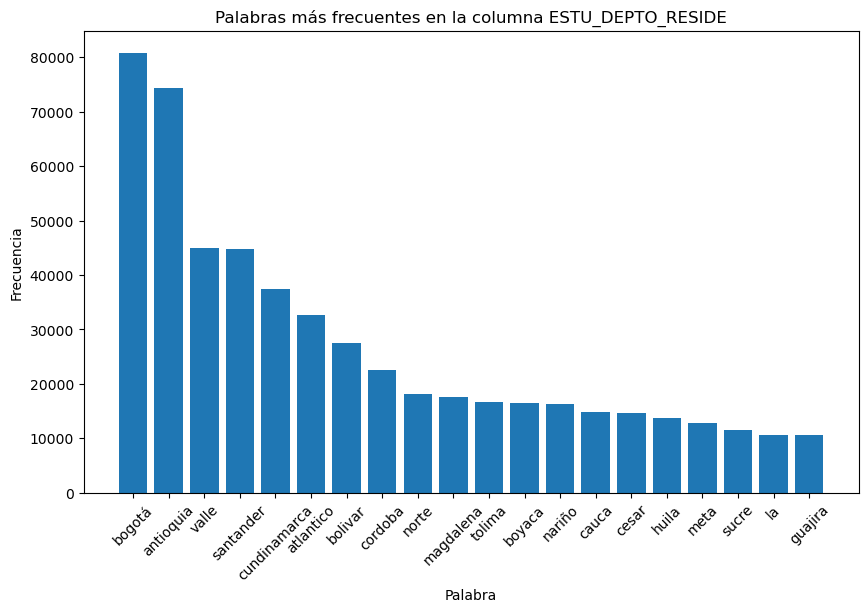

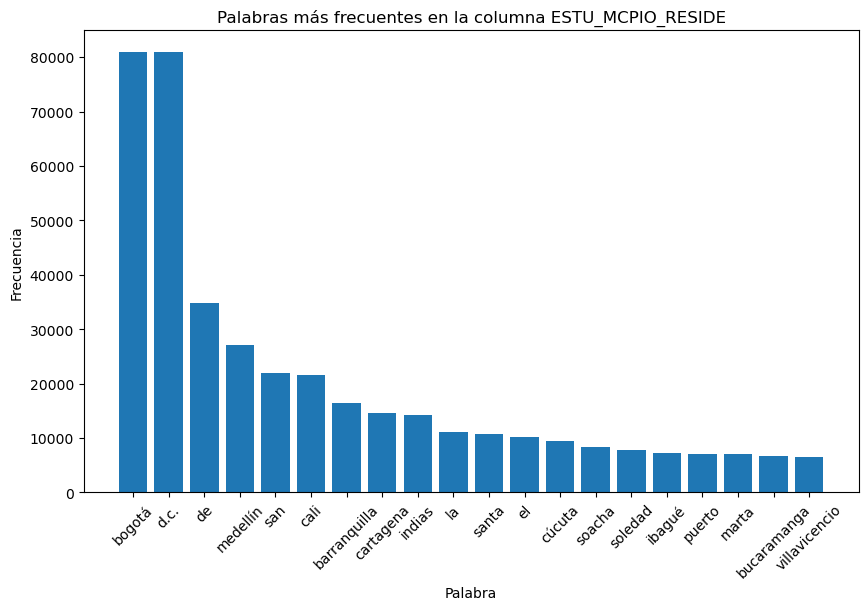

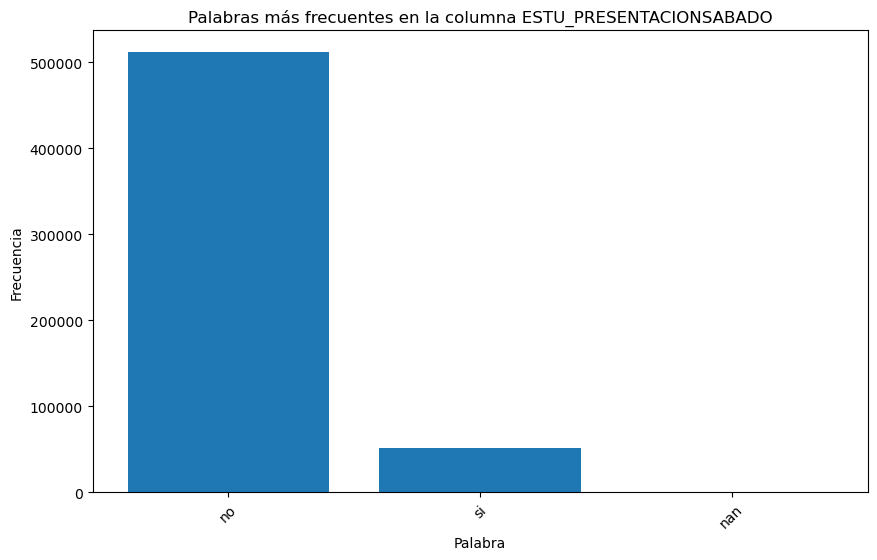

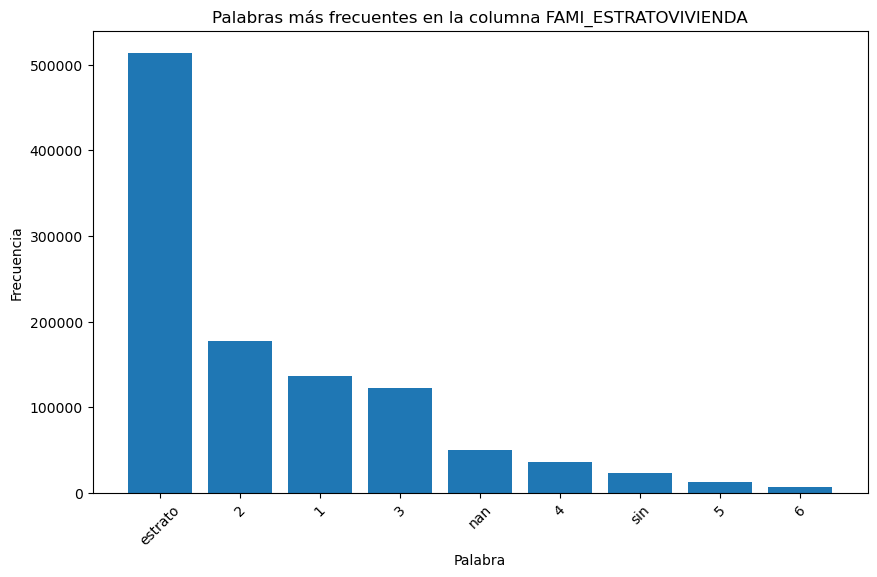

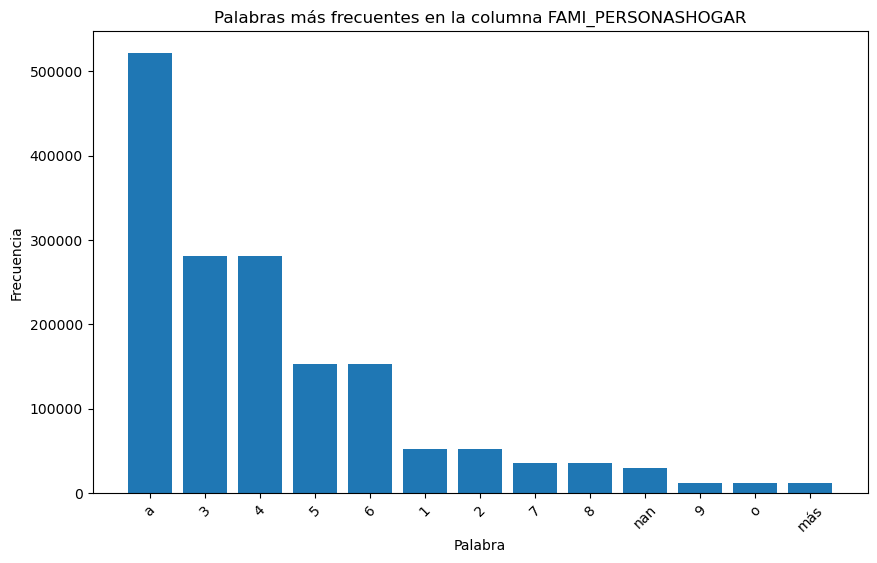

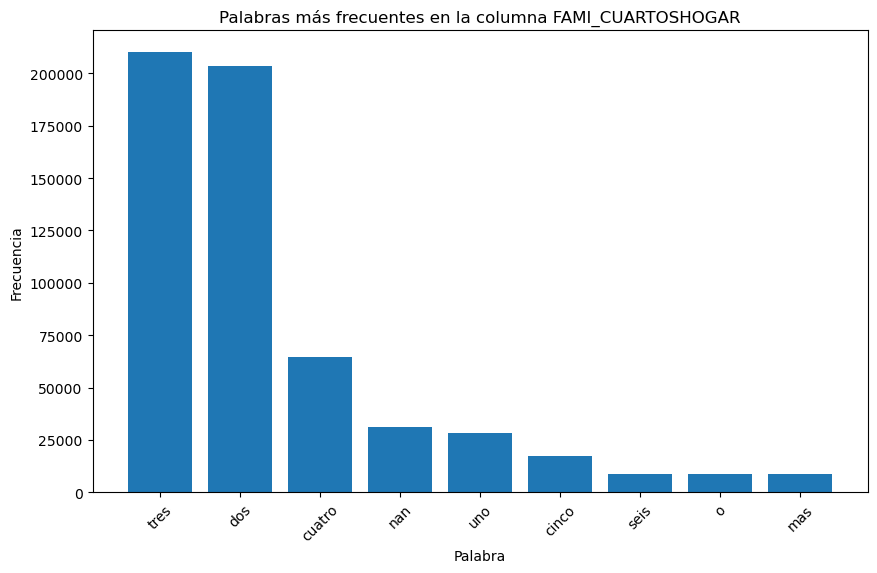

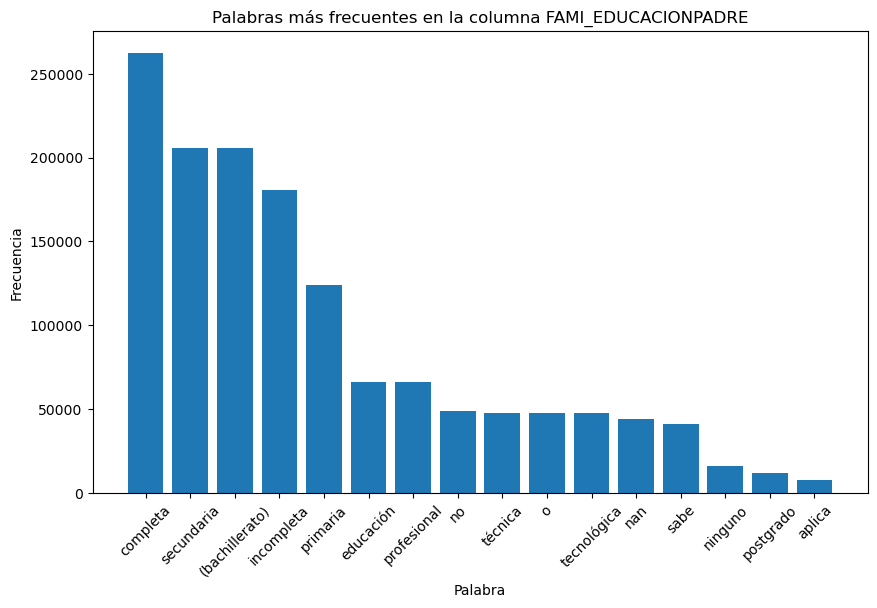

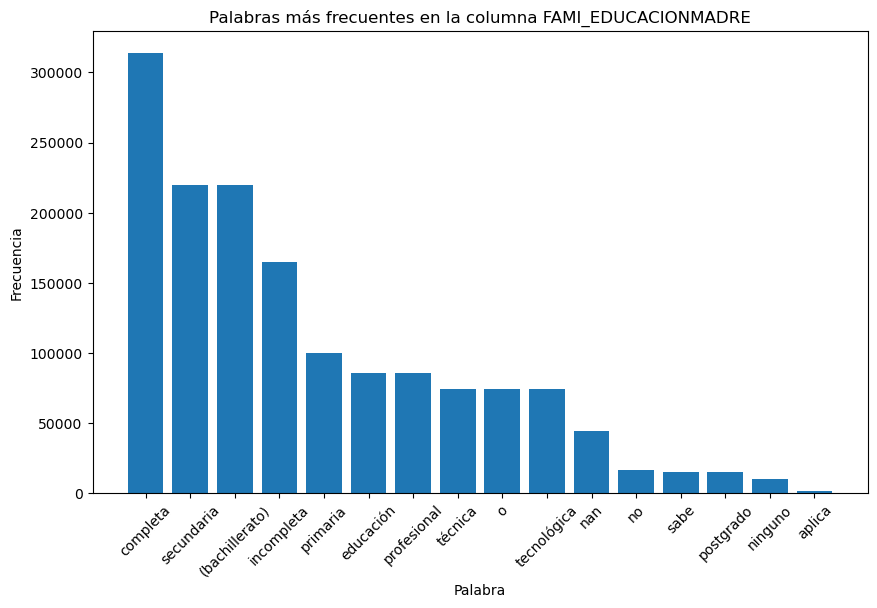

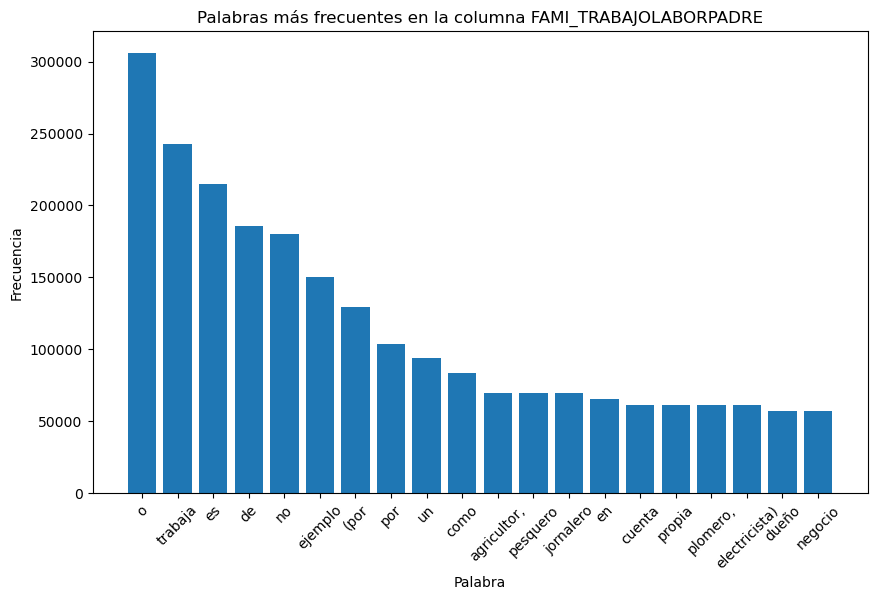

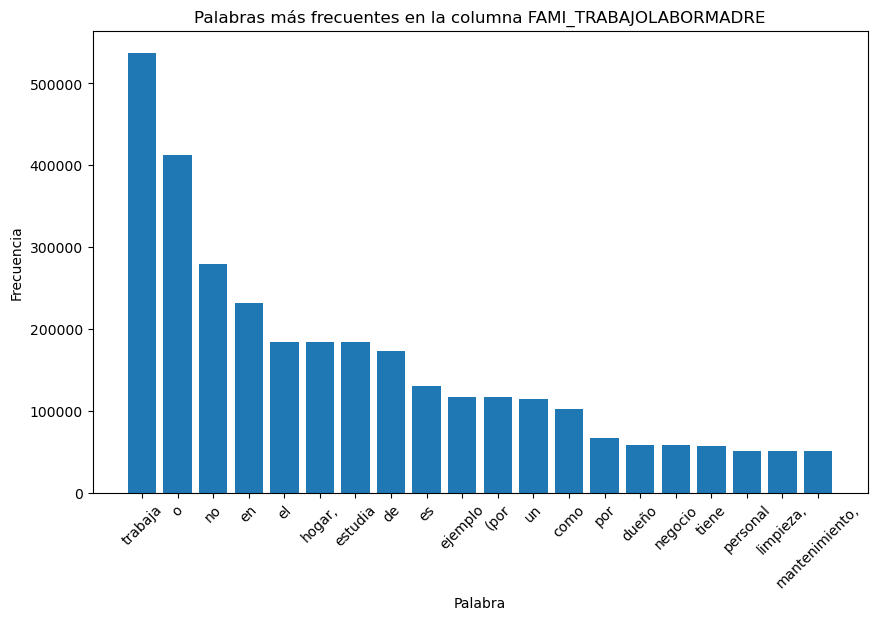

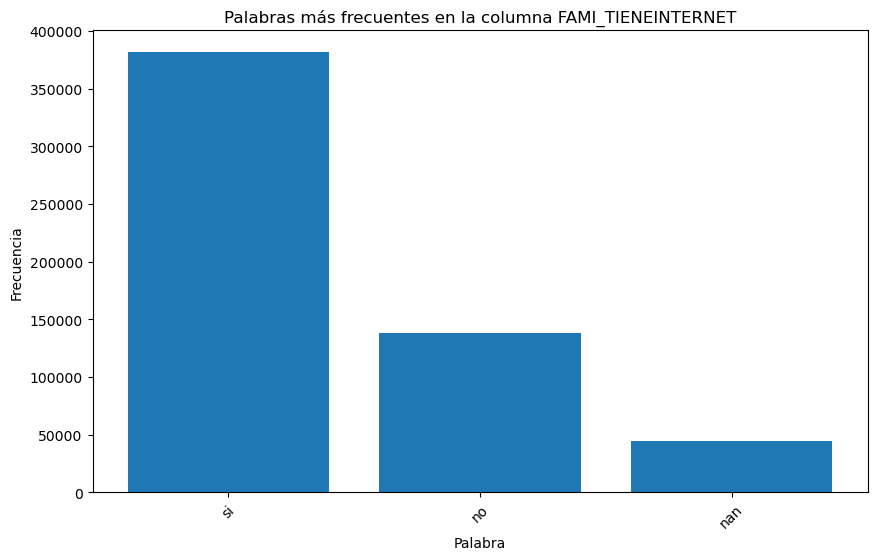

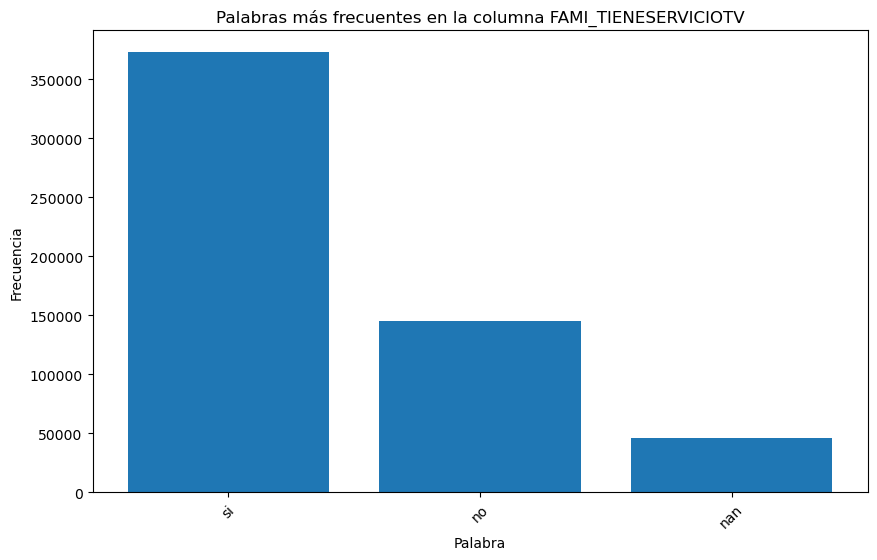

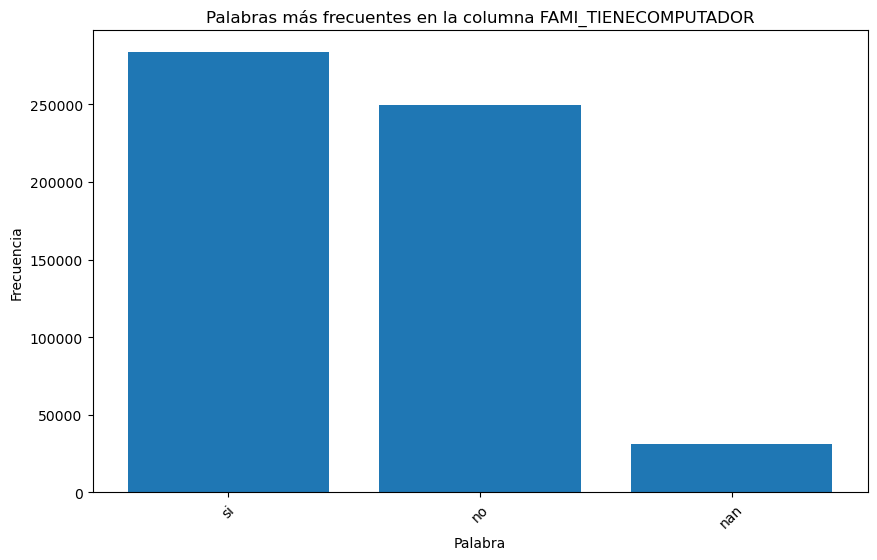

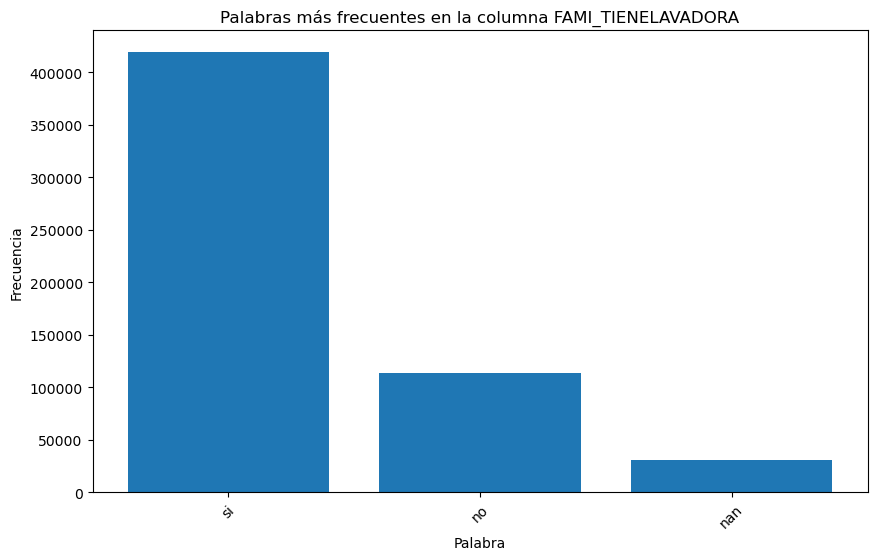

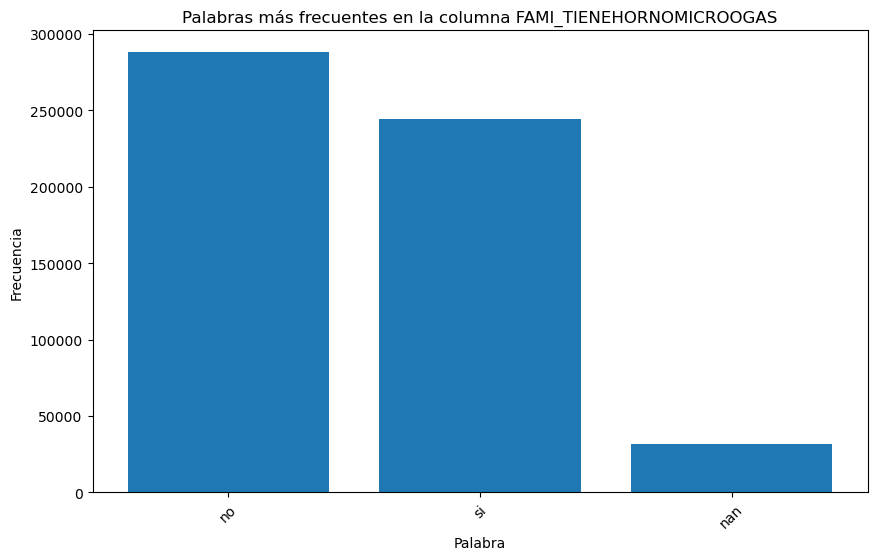

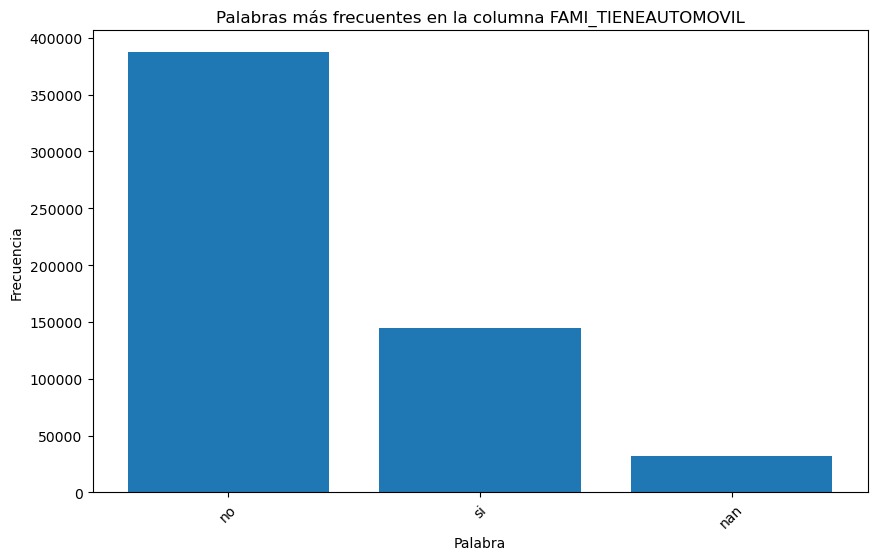

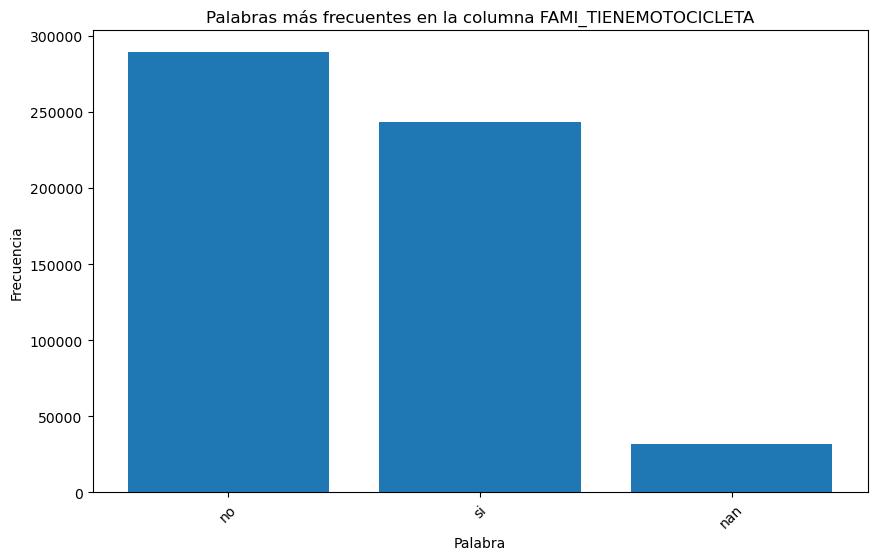

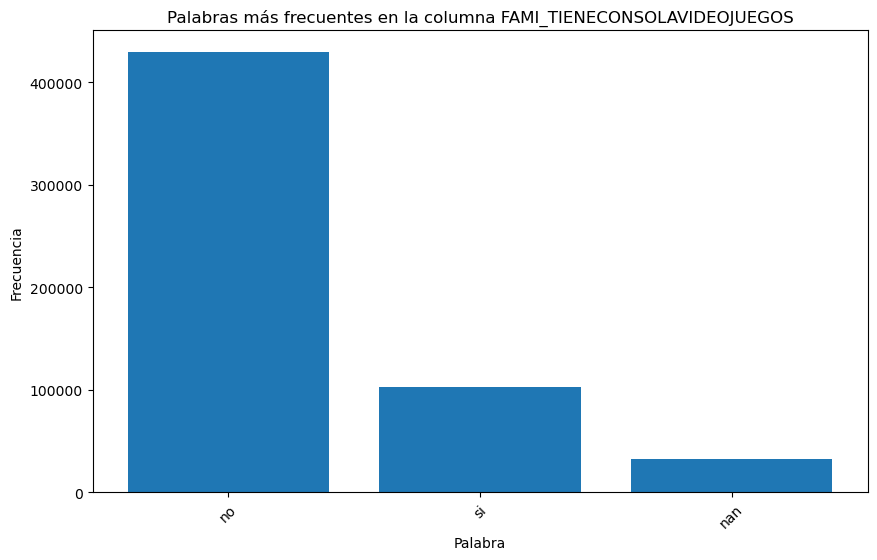

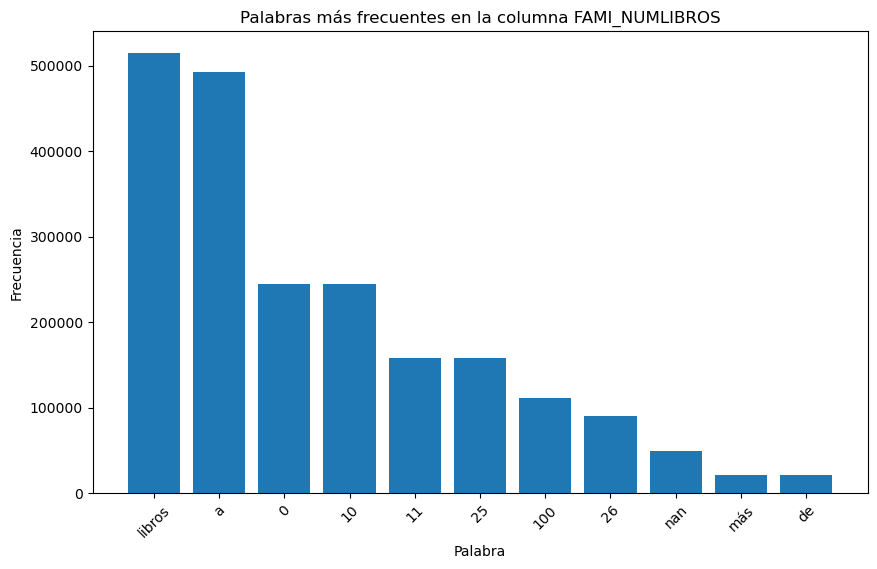

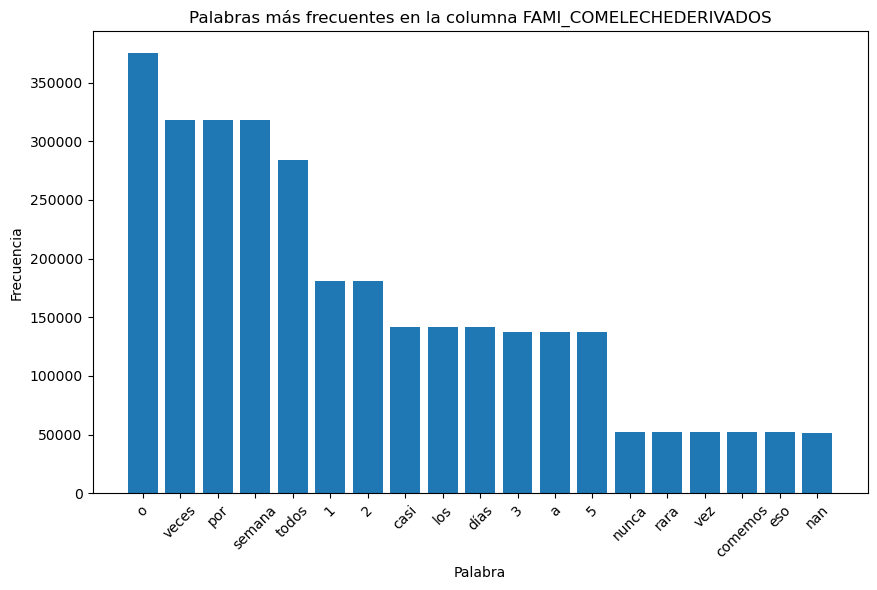

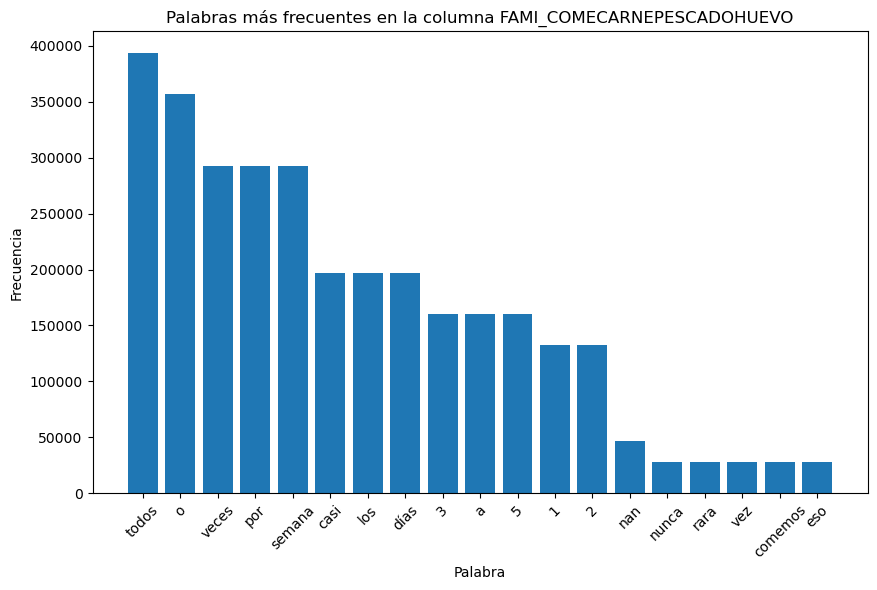

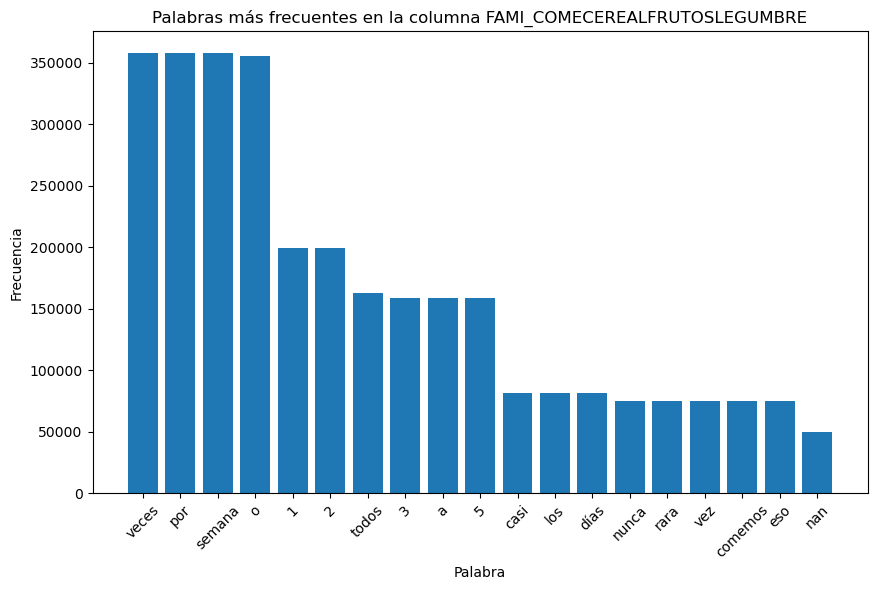

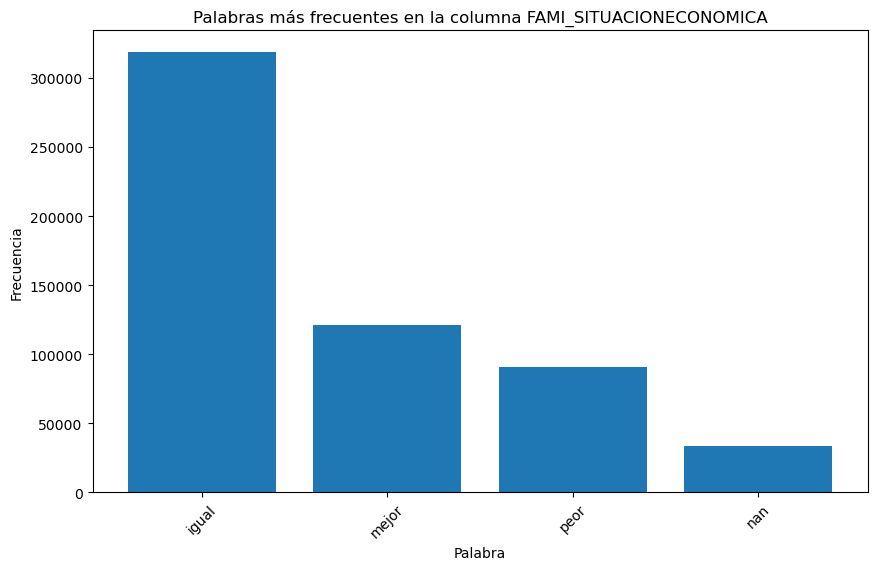

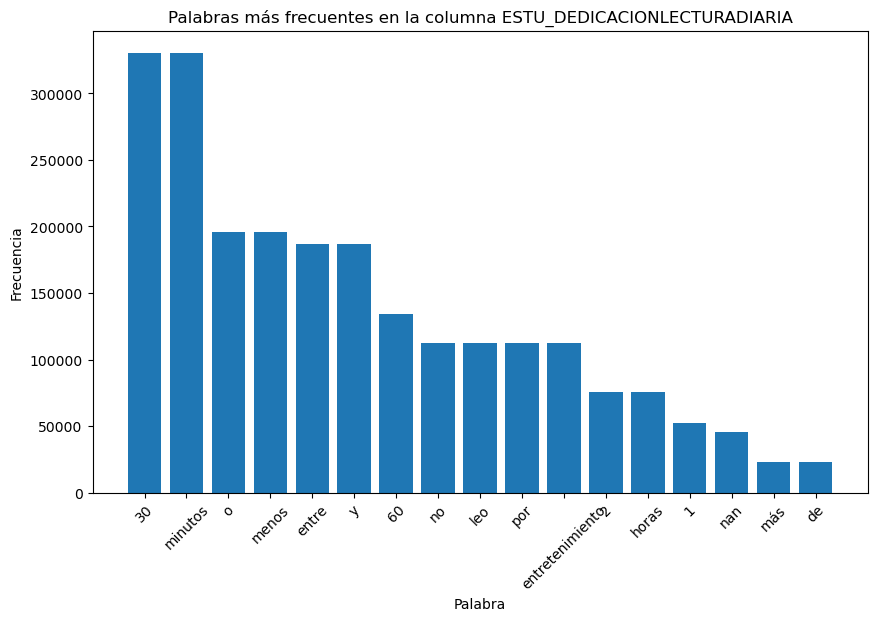

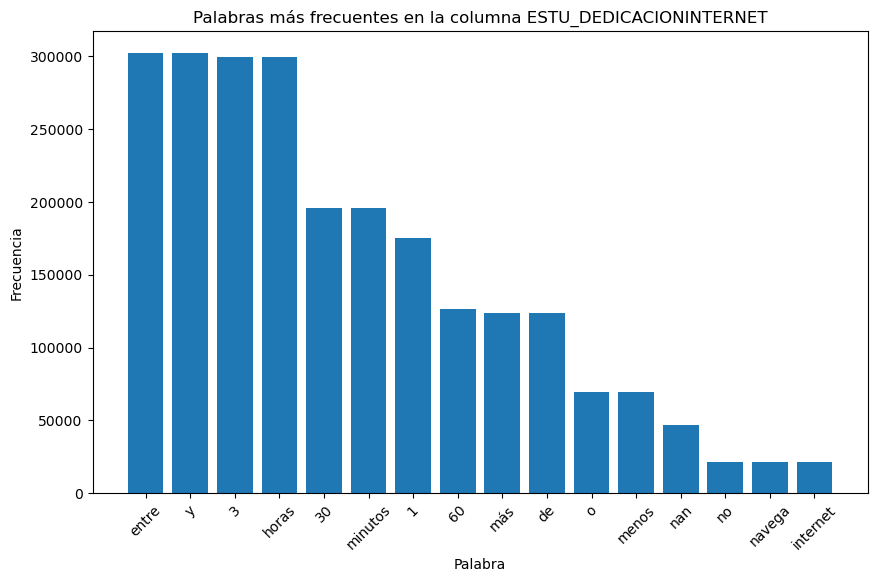

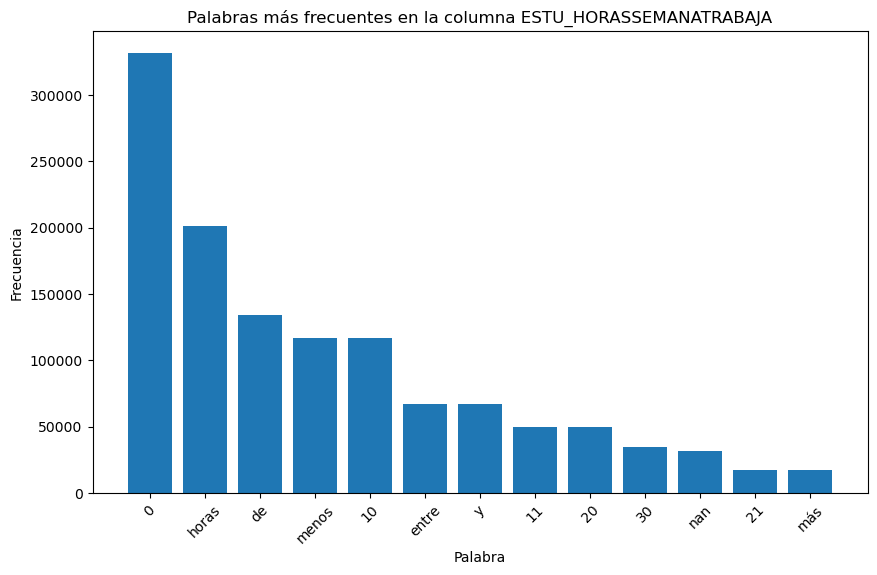

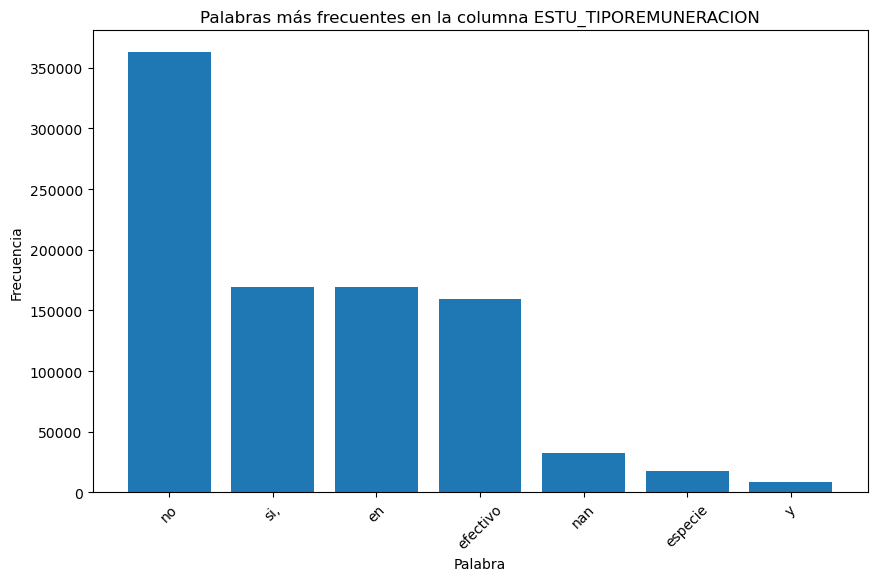

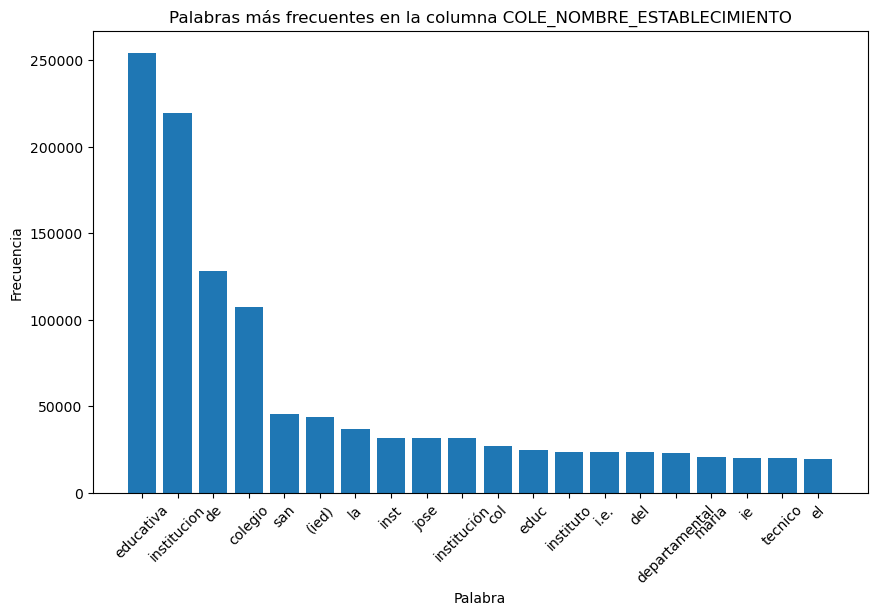

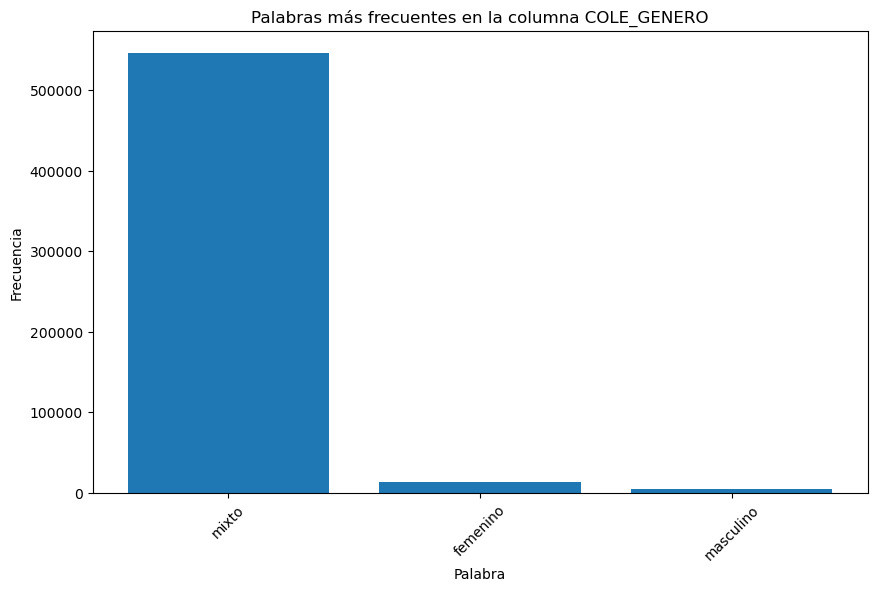

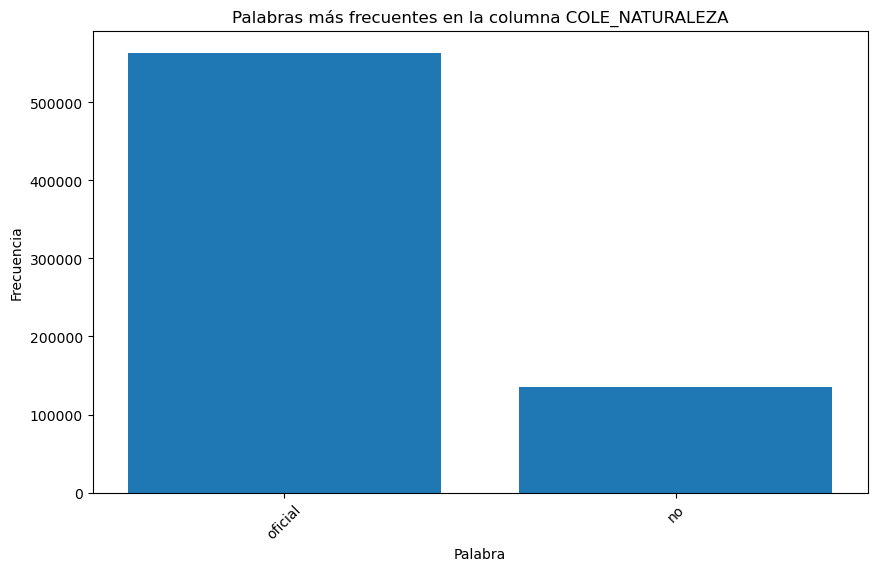

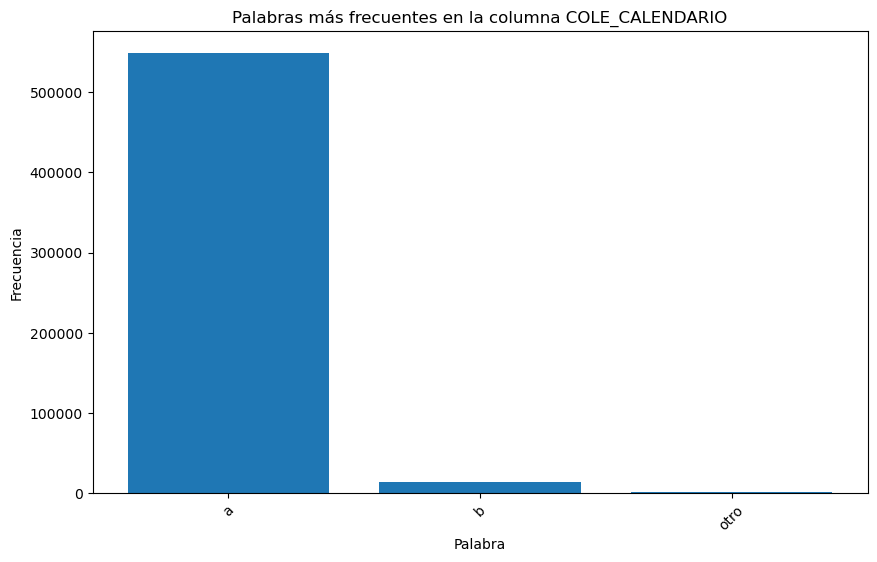

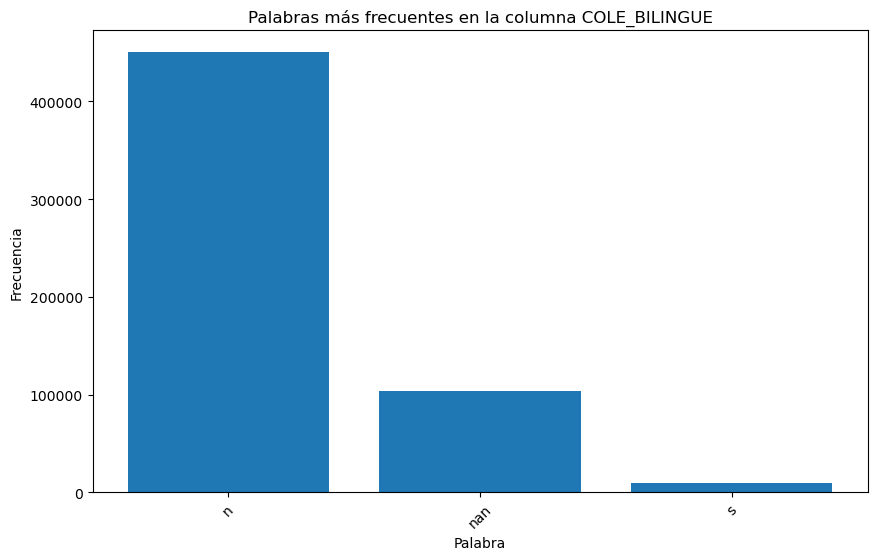

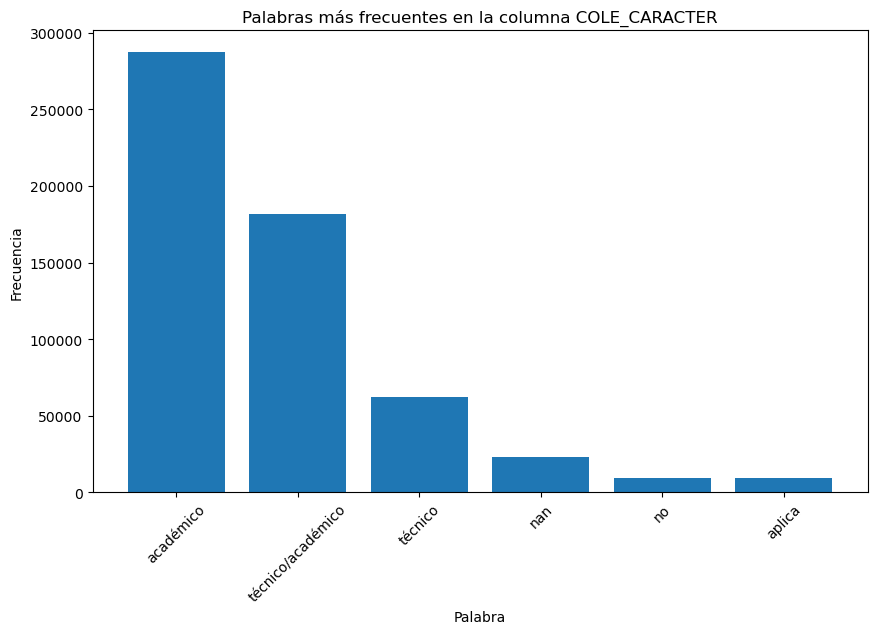

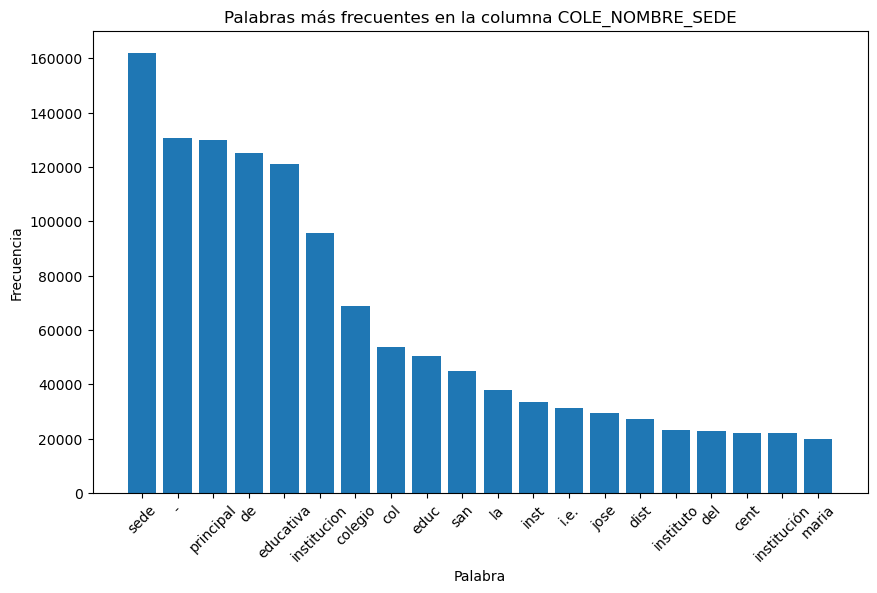

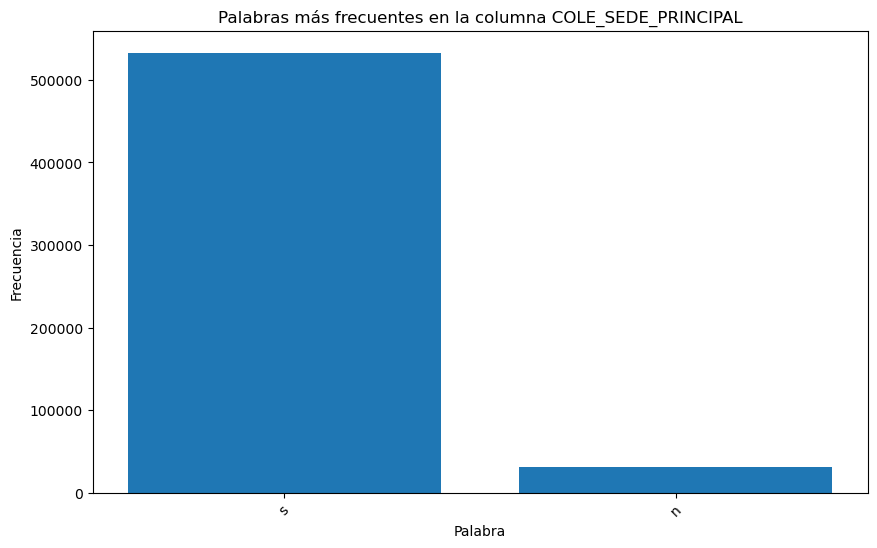

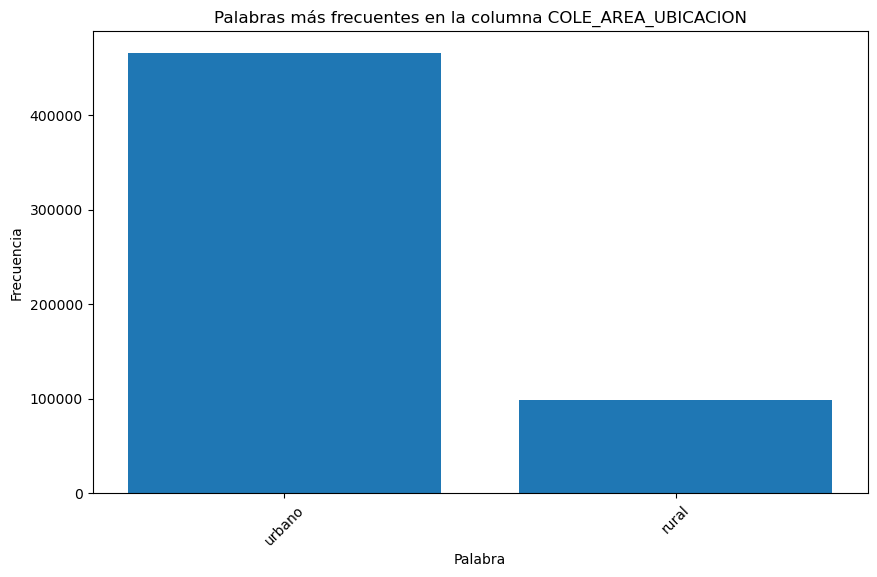

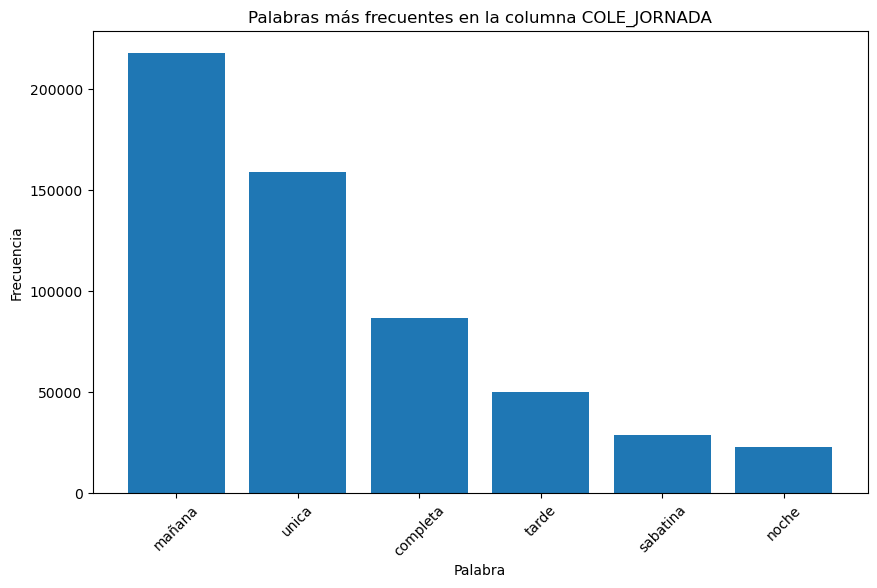

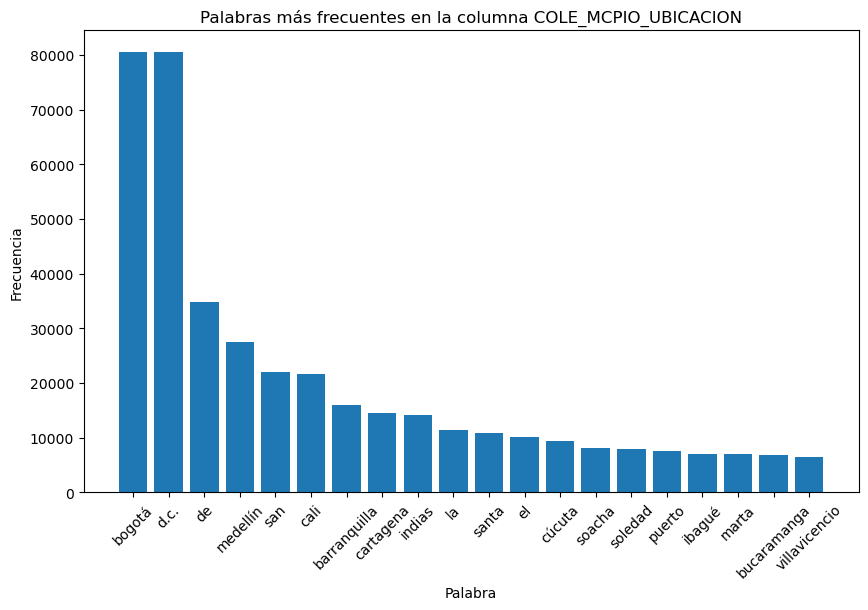

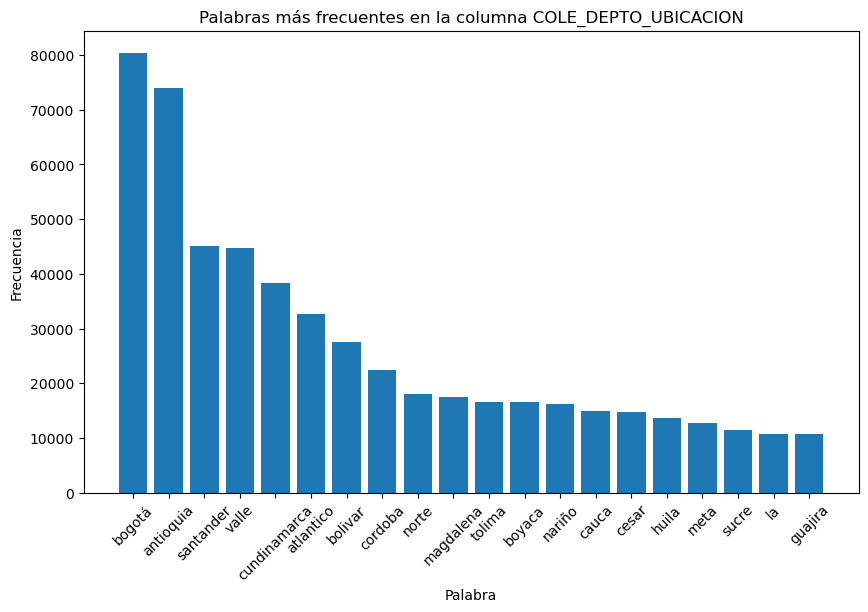

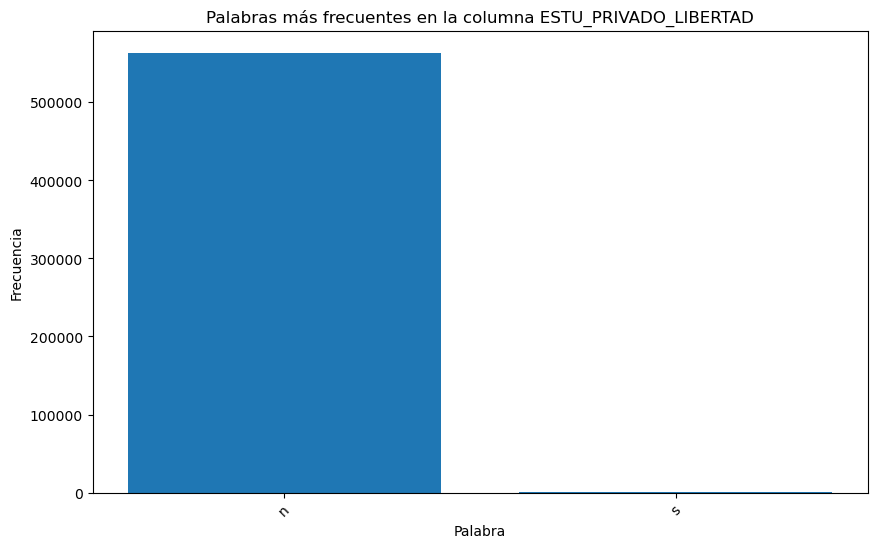

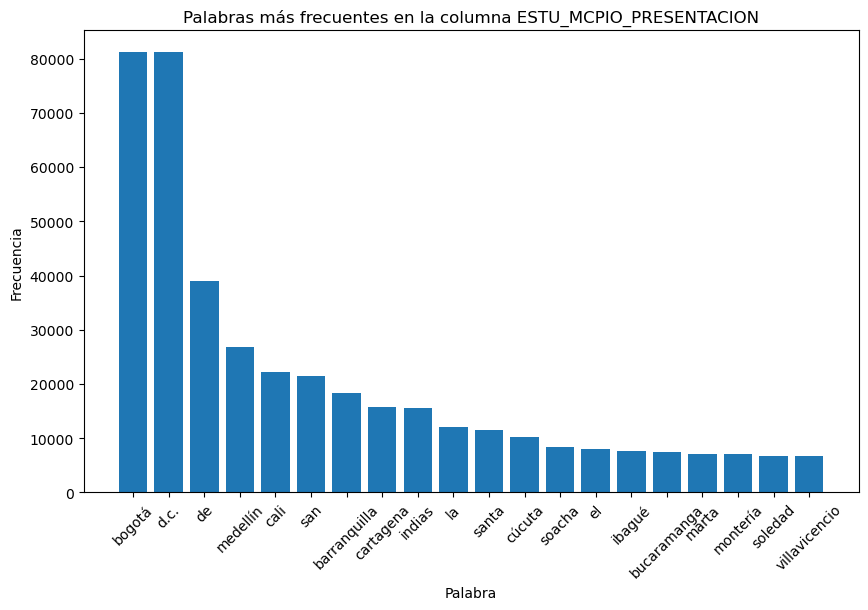

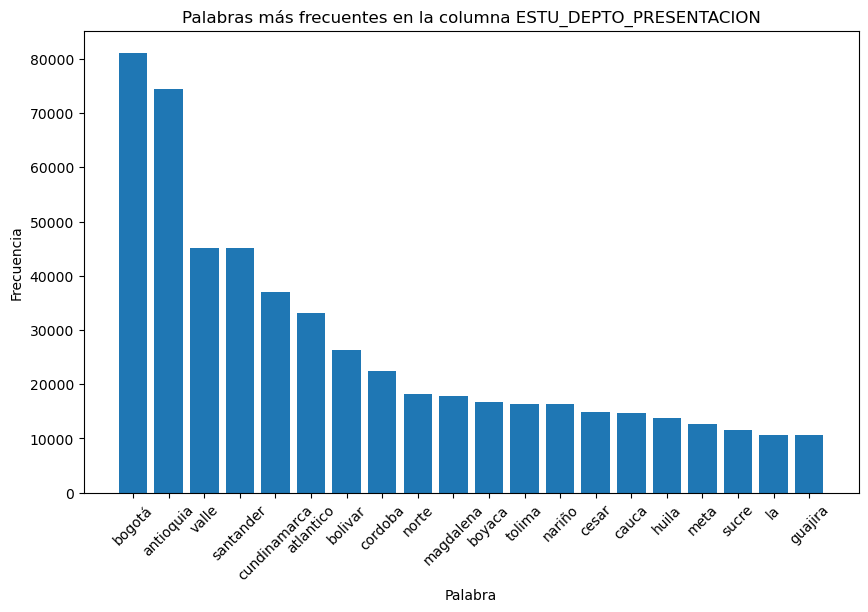

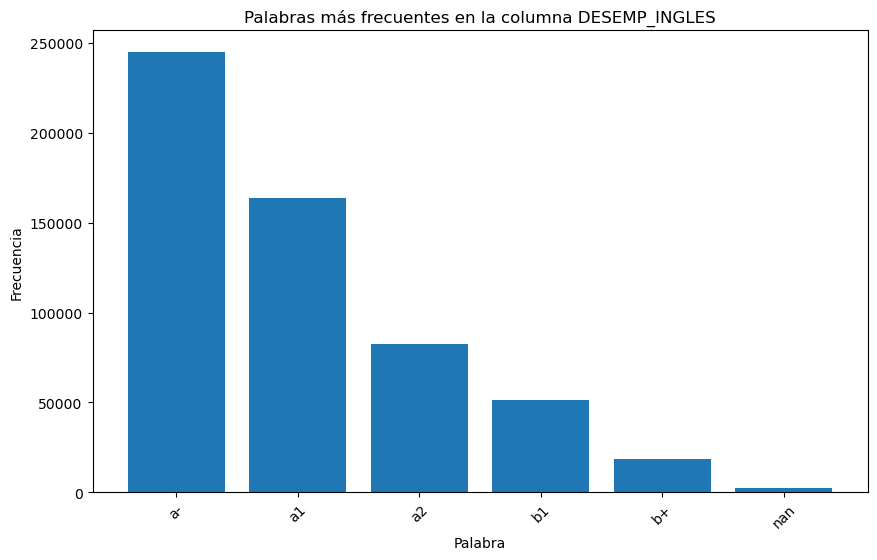

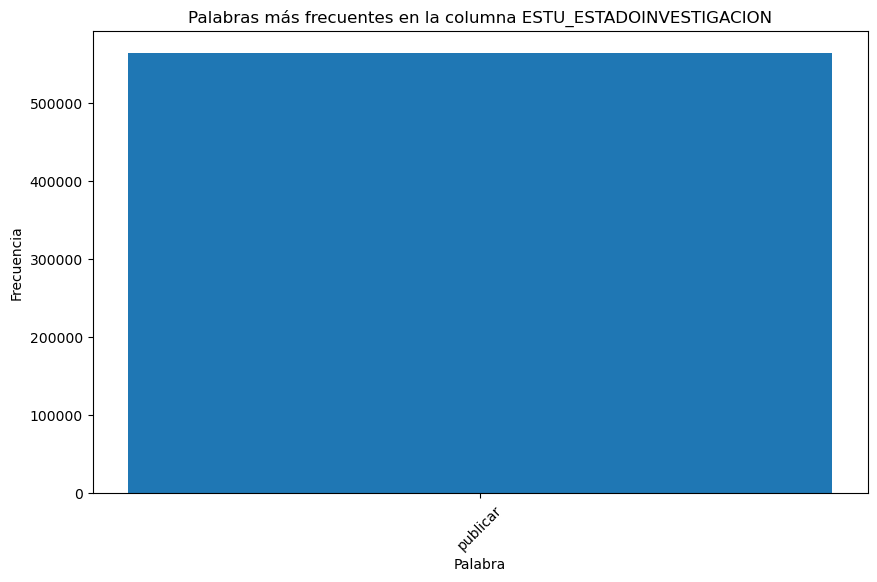

In [26]:
analisis_frecuencia_palabras(df)

StatementMeta(, e396ebe1-44f0-4759-81ec-36d84ab2cff1, 29, Finished, Available)

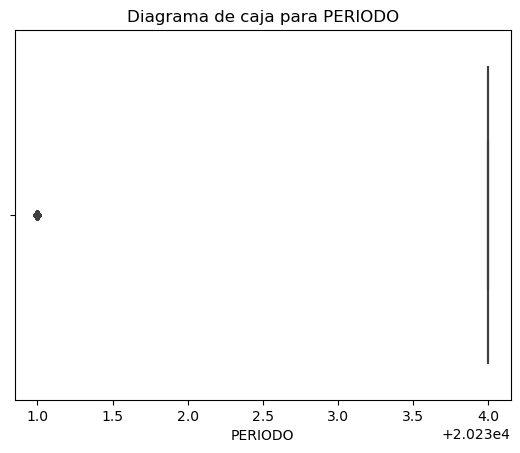

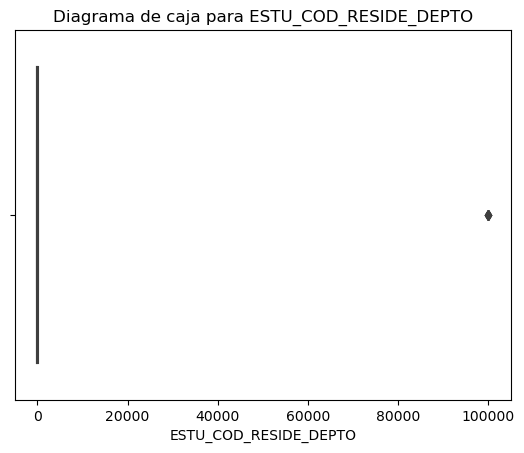

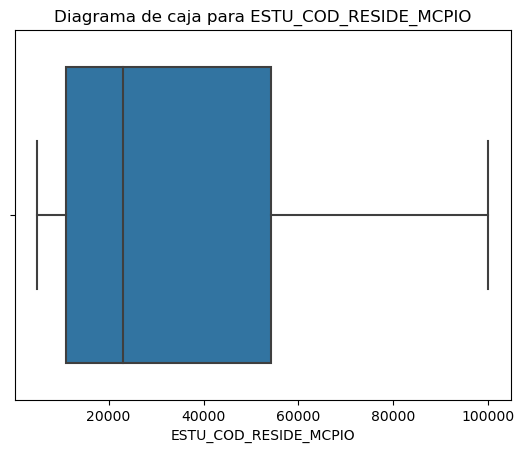

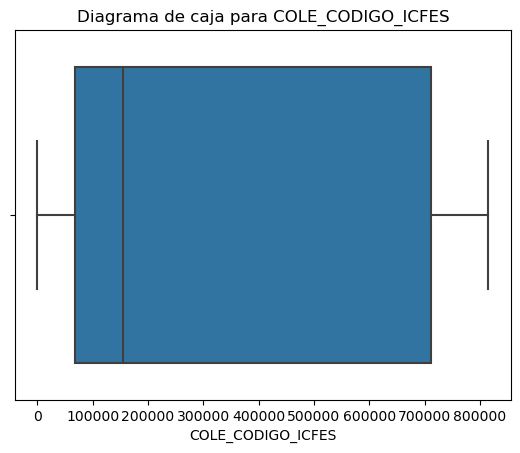

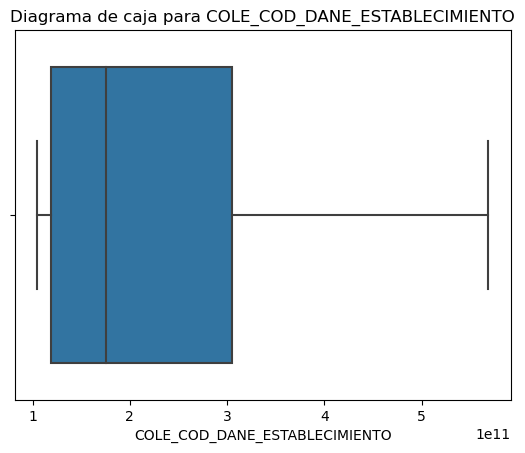

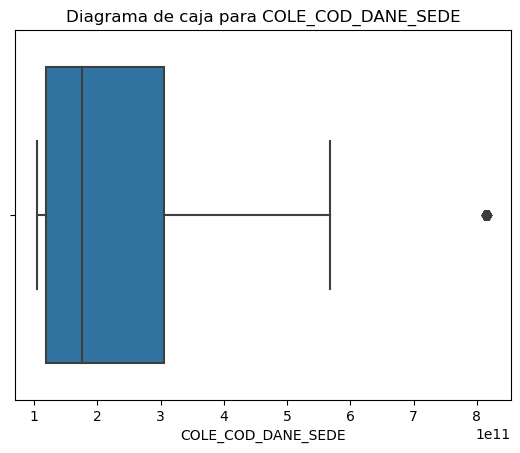

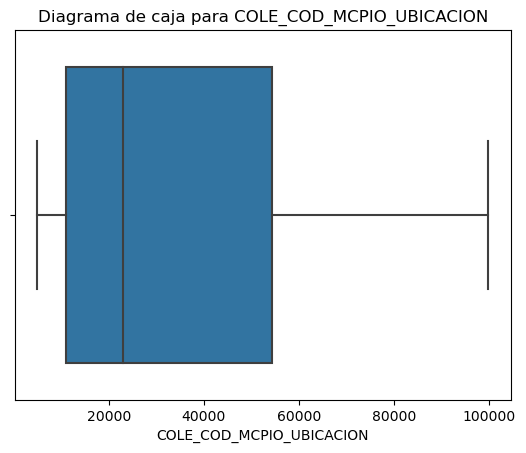

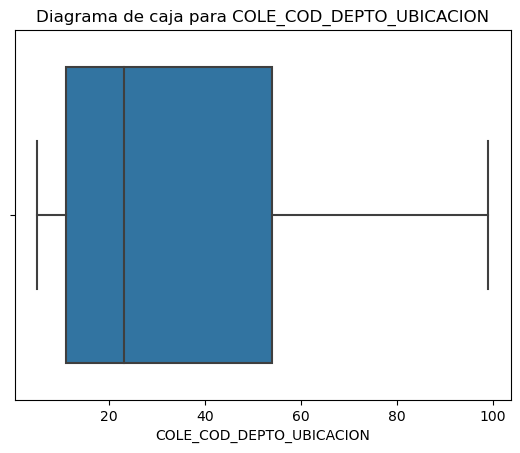

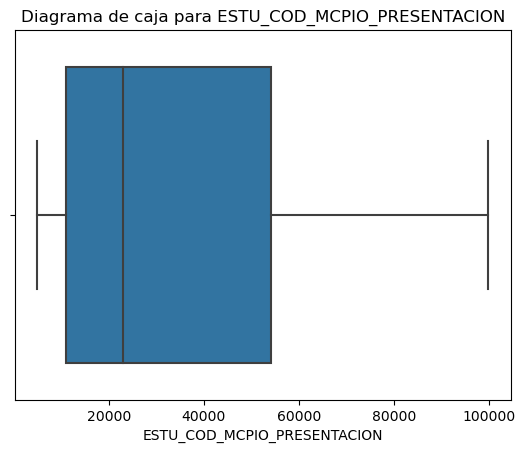

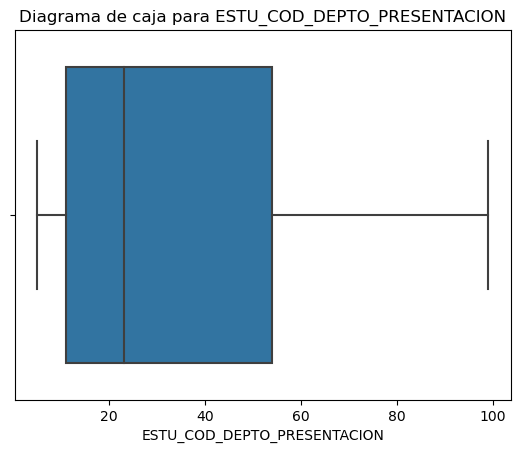

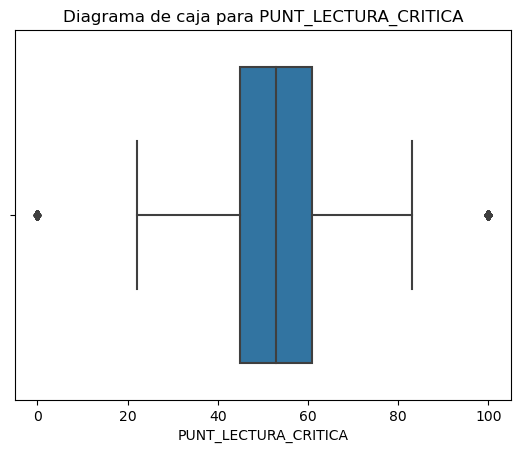

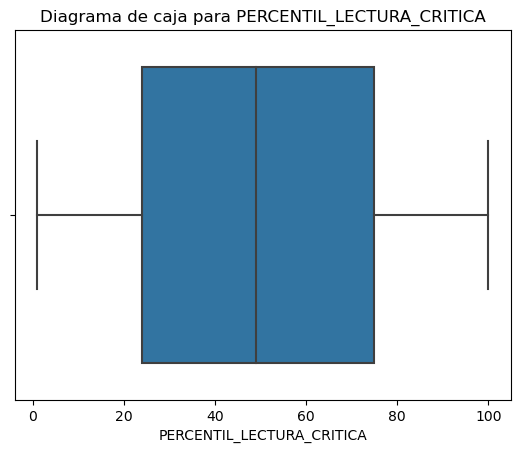

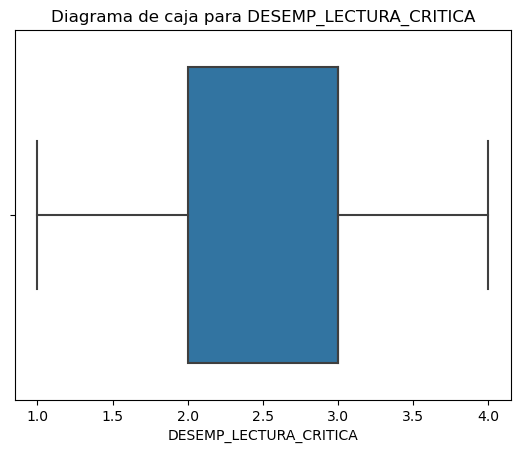

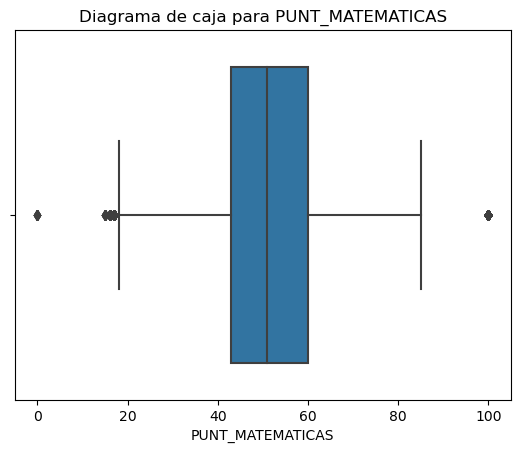

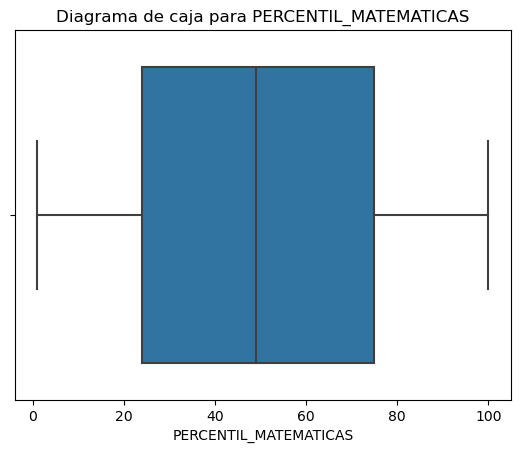

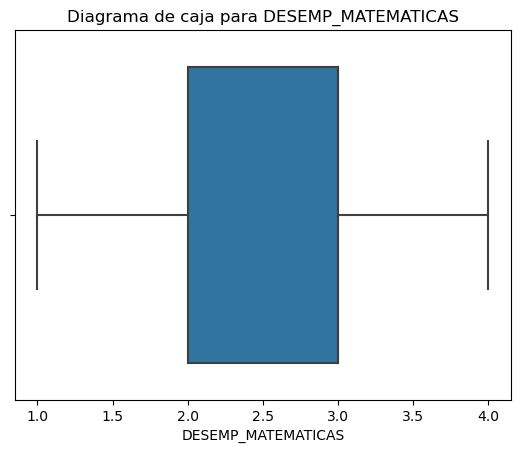

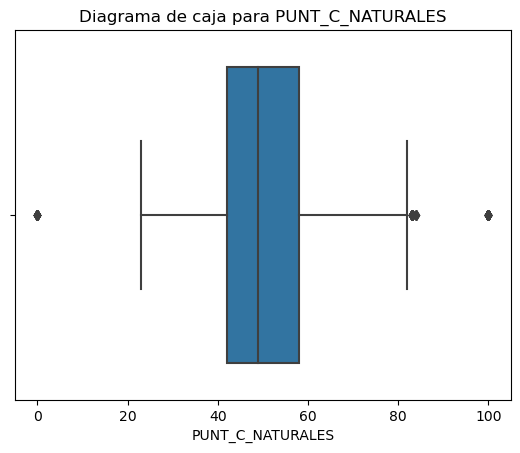

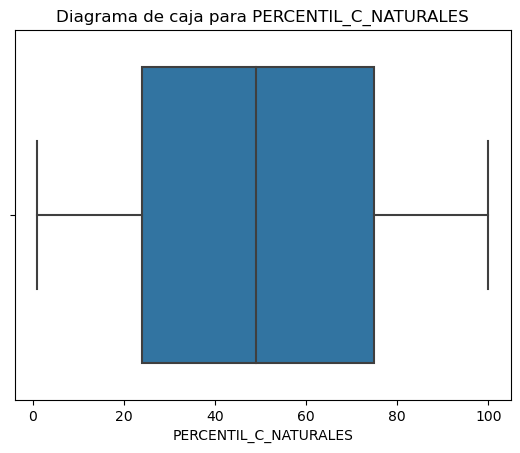

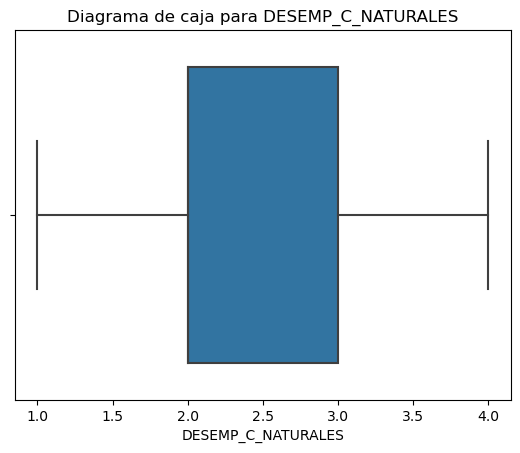

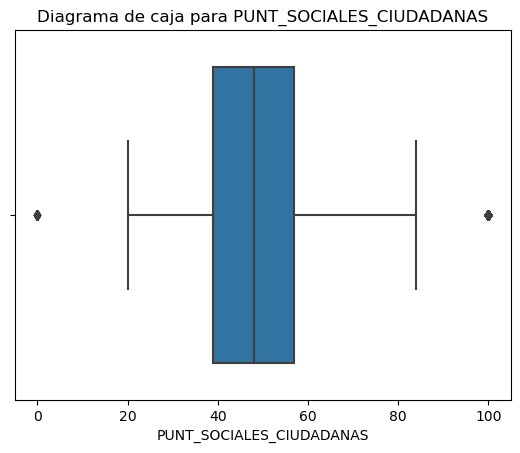

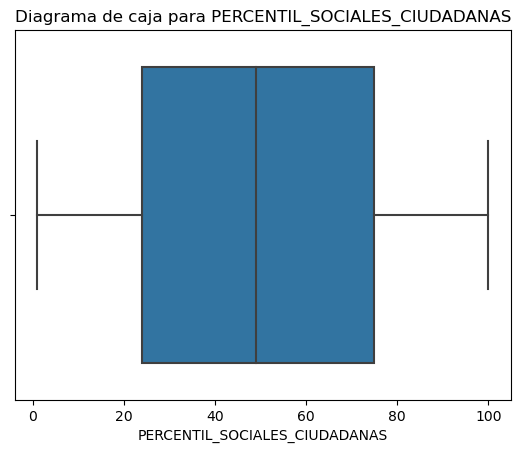

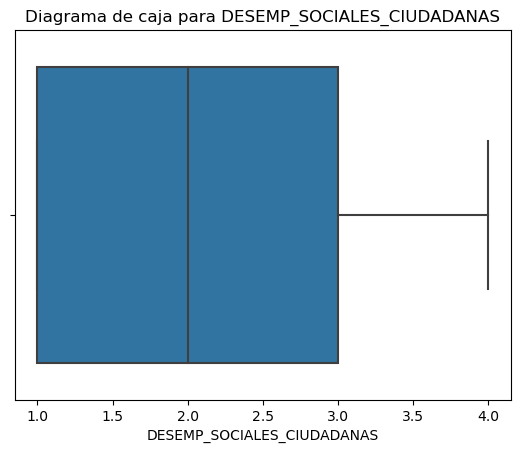

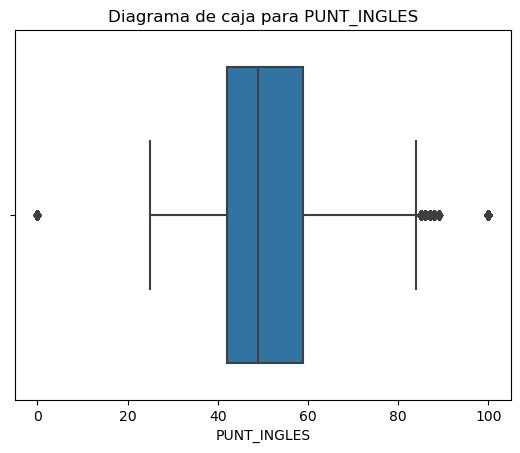

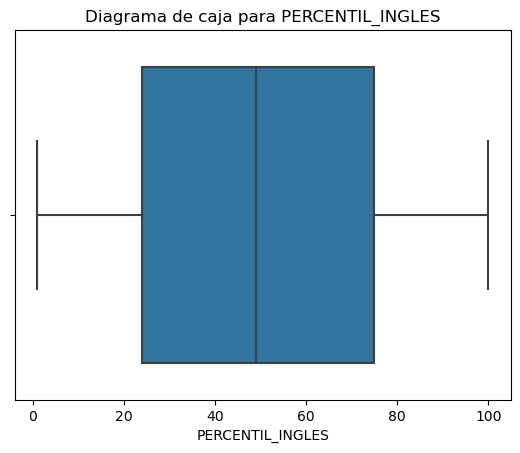

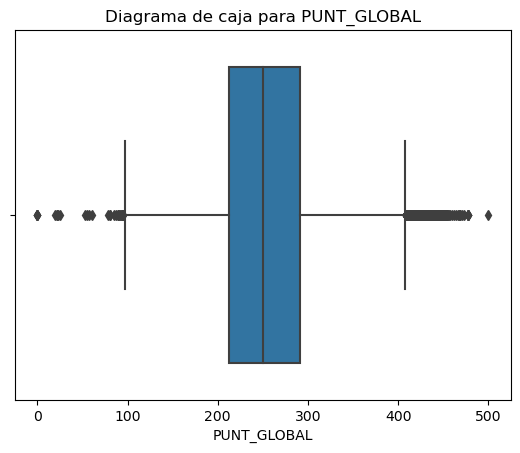

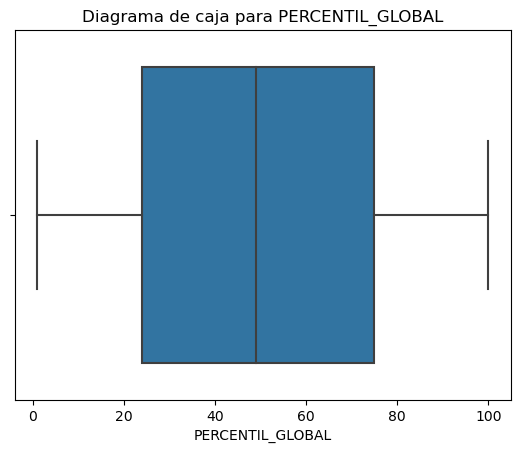

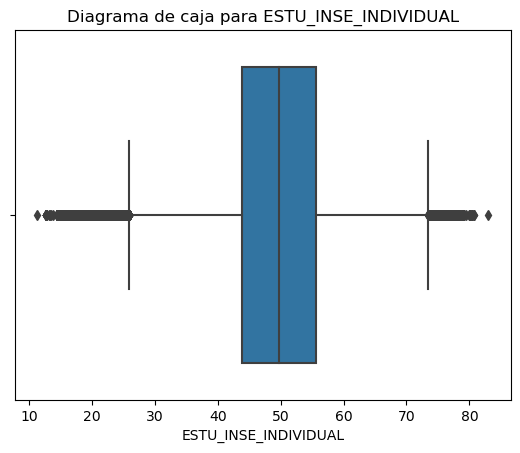

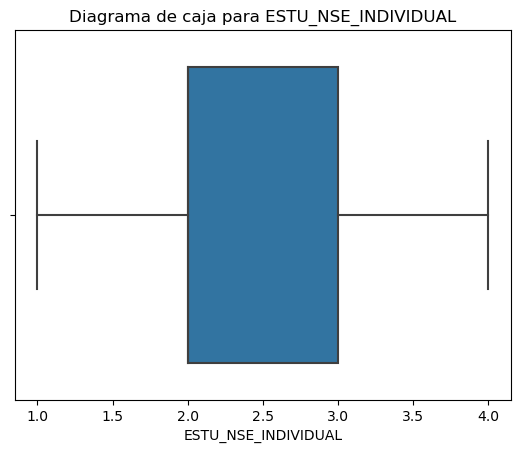

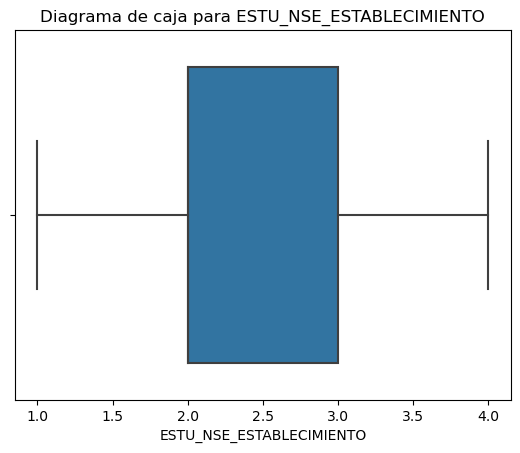

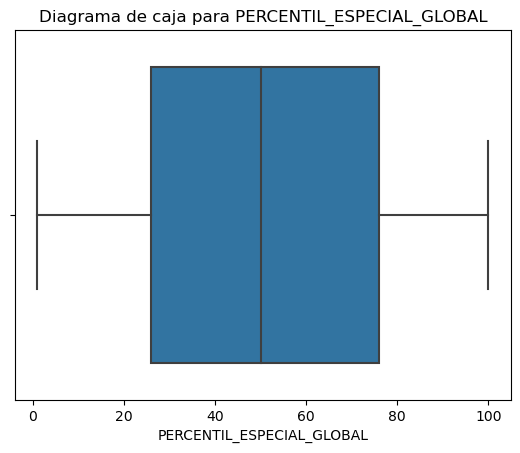

In [27]:
boxplots_numericas(df)

StatementMeta(, e396ebe1-44f0-4759-81ec-36d84ab2cff1, 30, Finished, Available)

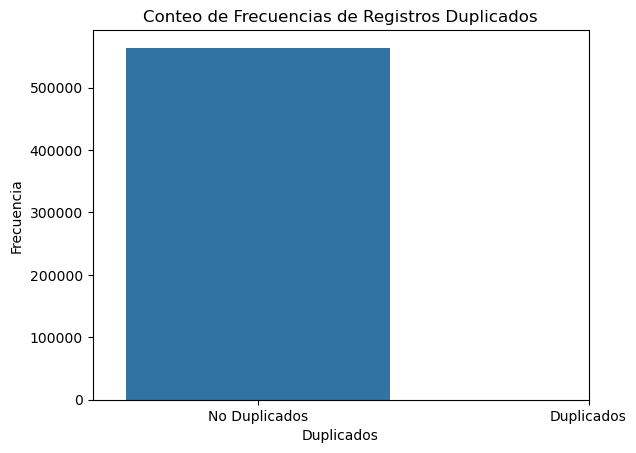

In [28]:
hist_duplicados(df)

# **Conclusiones**

# Diccionario de Datos